# Introduction

This notebook imports the csv file that was output from notebook 2.

**NOTE: Version 0.11.0 of seaborn is required to run certain plots in this file, so use the code in the third cell in case certain plots are not working (seaborn changed the name of some of their plot functions between the old and new versions)**

A dataframe that consists of only countries in the region of Africa is created. Then EDA is performed. EDA includes the following:
 * Charts looking at general variables in Africa
 
 * Charts looking at State responses in Africa overall

 * Plots looking at demand and responses vs country
 
 * Line plots over time showing the following:
   * number of protests per year divided by country

   * how many of each type of demand occurred per year divided by region
   * how many of each type of demand occurred per year divided by country
   
   * how many of each type of response occurred per year divided by region
   * how many of each type of response occurred per year divided by country

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [34]:
# run to update seaborn so that the new seaborn will work

# pip install seaborn==0.11.0

In [35]:
df = pd.read_csv('../data/df_all.csv')

# Basic Review of the Dataframe

In [36]:
df.head()

id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  endday  endmonth  endyear  \
0      15.0         1.0     1990.0    15.0       1.0   1990.0   
1      25.0         6.0     1990.0    25.0       6.0   1990.0   
2       1.0         7.0     1990.0     1.0       7.0   1990.0   
3      12.0         7.0     1990.0     6.0       9.0   1990.0   
4      14.0         8.0     1990.0    15.0       8.0   1990.0   

   protesterviolence          location participants_category participants  \
0                0.0          national                   999        1000s   
1                0.0  Montreal, Quebec                   999         1000   
2                0.0  Montreal, Quebec                   999          500   
3                1.0  Montreal, Quebec                   999         100s   
4                1.0  Montreal, Quebec                   999          950   

              protesteridentity  protesterdemand1  protesterdemand2  \
0                   unspecified               1.0              10.0   
1                   unspecified               1.0               0.0   
2   separatist  Parti Quebecois               1.0               0.0   
3                Mohawk Indians          100000.0               0.0   
4               local residents               1.0               0.0   

   protesterdemand3  protesterdemand4  stateresponse1  stateresponse2  \
0               0.0               0.0            10.0             0.0   
1               0.0               0.0            10.0             0.0   
2               0.0               0.0            10.0             0.0   
3               0.0               0.0             1.0             0.0   
4               0.0               0.0          1000.0           100.0   

   stateresponse3  stateresponse4  stateresponse5  stateresponse6  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   stateresponse7                                            sources  \
0             0.0  1. Great Canadian train journeys into history;...   
1             0.0  1. Autonomy s Cry Revived in Quebec The New Yo...   
2             0.0  1. Quebec protest after Queen calls for unity ...   
3             0.0  1. Indians Gather as Siege Intensifies; Armed ...   
4             0.0  1. Dozens hurt in Mohawk blockade protest The ...   

                                               notes  years  months  days  \
0   Canada s railway passenger system was finally...    0.0     0.0   0.0   
1  protestors were only identified as  young peop...    0.0     0.0   0.0   
2   THE Queen, after calling on Canadians to rema...    0.0     0.0   0.0   
3   Canada s federal government has agreed to acq...    0.0     2.0  -6.0   
4  Protests were directed against the state due t...    0.0     0.0   1.0   

   total_days  dem_protesterdemand1  dem_protesterdemand2  \
0         0.0                   1.0                   0.0   
1         0.0                   0.0                   1.0   
2         0.0                   0.0                   0.0   
3        55.0                   0.0                   0.0   
4         1.0                   NaN                   NaN   

   dem_protesterdemand3  dem_protesterdemand4  resp_stateresponse1  \
0                   0.0                   0.0                  1.0   
1              

In [37]:
africa_df = df[df['region'] == 'Africa'].copy()

In [38]:
africa_df.head()

id     country  ccode  year  region  protest  protestnumber  \
7974  4021990000  Cape Verde    402  1990  Africa        0              0   
7975  4021991000  Cape Verde    402  1991  Africa        0              0   
7976  4021992000  Cape Verde    402  1992  Africa        0              0   
7977  4021993000  Cape Verde    402  1993  Africa        0              0   
7978  4021994000  Cape Verde    402  1994  Africa        0              0   

      startday  startmonth  startyear  endday  endmonth  endyear  \
7974     999.0       999.0      999.0   999.0     999.0    999.0   
7975     999.0       999.0      999.0   999.0     999.0    999.0   
7976     999.0       999.0      999.0   999.0     999.0    999.0   
7977     999.0       999.0      999.0   999.0     999.0    999.0   
7978     999.0       999.0      999.0   999.0     999.0    999.0   

      protesterviolence location participants_category participants  \
7974              999.0      NaN                   999          999   
7975              999.0      NaN                   999          999   
7976              999.0      NaN                   999          999   
7977              999.0      NaN                   999          999   
7978              999.0      NaN                   999          999   

     protesteridentity  protesterdemand1  protesterdemand2  protesterdemand3  \
7974               NaN               0.0               0.0               0.0   
7975               NaN               0.0               0.0               0.0   
7976               NaN               0.0               0.0               0.0   
7977               NaN               0.0               0.0               0.0   
7978               NaN               0.0               0.0               0.0   

      protesterdemand4  stateresponse1  stateresponse2  stateresponse3  \
7974               0.0             0.0             0.0             0.0   
7975               0.0             0.0             0.0             0.0   
7976               0.0             0.0             0.0             0.0   
7977               0.0             0.0             0.0             0.0   
7978               0.0             0.0             0.0             0.0   

      stateresponse4  stateresponse5  stateresponse6  stateresponse7 sources  \
7974             0.0             0.0             0.0             0.0     NaN   
7975             0.0             0.0             0.0             0.0     NaN   
7976             0.0             0.0             0.0             0.0     NaN   
7977             0.0             0.0             0.0             0.0     NaN   
7978             0.0             0.0             0.0             0.0     NaN   

     notes  years  months  days  total_days  dem_protesterdemand1  \
7974   NaN    0.0     0.0   0.0         0.0                   NaN   
7975   NaN    0.0     0.0   0.0         0.0                   NaN   
7976   NaN    0.0     0.0   0.0         0.0                   NaN   
7977   NaN    0.0     0.0   0.0         0.0                   NaN   
7978   NaN    0.0     0.0   0.0         0.0                   NaN   

      dem_protesterdemand2  dem_protesterdemand3  dem_protesterdemand4  \
7974                   NaN                   NaN                   NaN   
7975                   NaN                   NaN                   NaN   
7976                   NaN                   NaN                   NaN   
7977                   NaN                   NaN                   NaN   
7978                   NaN                   NaN                   NaN   

      resp_stateresponse1  resp_stateresponse2  resp_stateresponse3  \
7974                  NaN                  NaN                  NaN   
7975                  NaN                  NaN                  NaN   
7976                  NaN                  NaN                  NaN   
7977                  NaN                  NaN                  NaN   
7978                  NaN                  NaN                  NaN   

      resp_staterespo

In [39]:
africa_df.sum()

id                                                        18224602083904
country                Cape VerdeCape VerdeCape VerdeCape VerdeCape V...
ccode                                                            1821732
year                                                             7282057
region                 AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...
                                             ...                        
stateresponse                                                3.37691e+08
protesterdemand_int                                            118311251
protesterdemand_str                                            118311251
stateresponse_int                                              337690914
stateresponse_str                                              337690914
Length: 63, dtype: object

In [40]:
africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 7974 to 11603
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3630 non-null   int64  
 1   country                      3630 non-null   object 
 2   ccode                        3630 non-null   int64  
 3   year                         3630 non-null   int64  
 4   region                       3630 non-null   object 
 5   protest                      3630 non-null   int64  
 6   protestnumber                3630 non-null   int64  
 7   startday                     3630 non-null   float64
 8   startmonth                   3630 non-null   float64
 9   startyear                    3630 non-null   float64
 10  endday                       3630 non-null   float64
 11  endmonth                     3630 non-null   float64
 12  endyear                      3630 non-null   float64
 13  protesterviole

# Drop unnecessary columns

In [47]:
protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
protest_demands_2 = ['dem_protesterdemand1','dem_protesterdemand2', 'dem_protesterdemand3', 'dem_protesterdemand4']

state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4','stateresponse5', 'stateresponse6', 'stateresponse7']
state_responses_2 = ['resp_stateresponse1', 'resp_stateresponse2', 'resp_stateresponse3', 'resp_stateresponse4','resp_stateresponse5', 'resp_stateresponse6', 'resp_stateresponse7']

col_to_drop_here = protest_demands + protest_demands_2 + state_responses + state_responses_2

africa_df.drop(columns = (col_to_drop_here), inplace=True)

In [48]:
list_of_countries = list(africa_df['country'].unique())
list_of_countries

['Cape Verde',
 'Guinea-Bissau',
 'Equatorial Guinea',
 'Gambia',
 'Mali',
 'Senegal',
 'Benin',
 'Mauritania',
 'Niger',
 'Ivory Coast',
 'Guinea',
 'Burkina Faso',
 'Liberia',
 'Sierra Leone',
 'Ghana',
 'Togo',
 'Cameroon',
 'Nigeria',
 'Gabon',
 'Central African Republic',
 'Chad',
 'Congo Brazzaville',
 'Congo Kinshasa',
 'Uganda',
 'Kenya',
 'Tanzania',
 'Burundi',
 'Rwanda',
 'Somalia',
 'Djibouti',
 'South Sudan',
 'Ethiopia',
 'Eritrea',
 'Angola',
 'Mozambique',
 'Zambia',
 'Zimbabwe',
 'Malawi',
 'South Africa',
 'Namibia',
 'Lesotho',
 'Botswana',
 'Swaziland',
 'Madagascar',
 'Comoros',
 'Mauritius']

In [49]:
# set up bar_plot function for later use in plotting a group of category columns

def bar_plot(df, columns):
    for category in columns:

        y_names = df[category].value_counts().index
        width = df[category].value_counts()

        plt.figure(figsize=(6,(len(y_names)/4)))
        plt.barh(y_names,width)
        plt.title('Category is: ' + category)
        plt.ylabel('category names')
        plt.xlabel('Number of values in a category')
        plt.show()

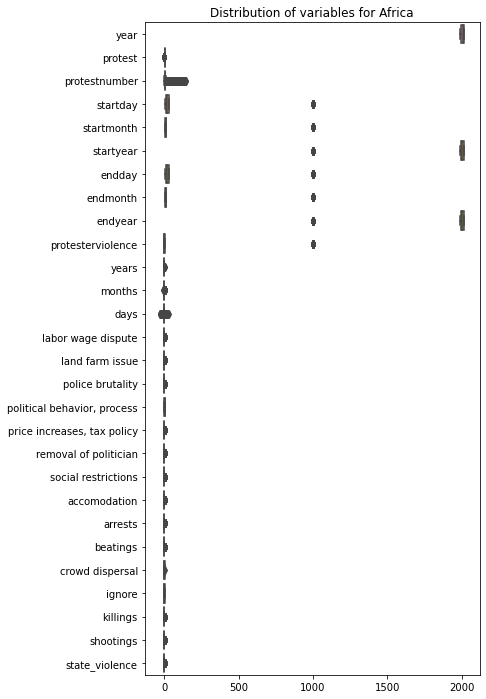

In [53]:
plt.figure(figsize = (6,12))
sns.boxplot(data=africa_df.drop(columns = ['protesterdemand','stateresponse','id','ccode','total_days','protesterdemand_int','stateresponse_int','protesterdemand_str','stateresponse_str']), orient = 'h')
plt.title('Distribution of variables for Africa');

# Review state reponses in Africa

In [54]:
list_of_demands = ['labor wage dispute',
                   'land farm issue',
                   'police brutality',
                   'political behavior, process',
                   'price increases, tax policy',
                   'removal of politician',
                   'social restrictions']

list_of_responses = ['accomodation',
                     'arrests',
                     'beatings',
                     'crowd dispersal',
                     'ignore',
                     'killings',
                     'shootings']

In [55]:
africa_df[list_of_responses].sum()

accomodation        384.0
arrests             509.0
beatings            234.0
crowd dispersal    1327.0
ignore             1263.0
killings            309.0
shootings           390.0
dtype: float64

In [56]:
africa_df[list_of_responses].sum().sort_values(ascending = False)

crowd dispersal    1327.0
ignore             1263.0
arrests             509.0
shootings           390.0
accomodation        384.0
killings            309.0
beatings            234.0
dtype: float64

In [57]:
africa_df[list_of_responses].sum().sort_values(ascending = False).index

Index(['crowd dispersal', 'ignore', 'arrests', 'shootings', 'accomodation',
       'killings', 'beatings'],
      dtype='object')

Text(0, 0.5, 'Count')

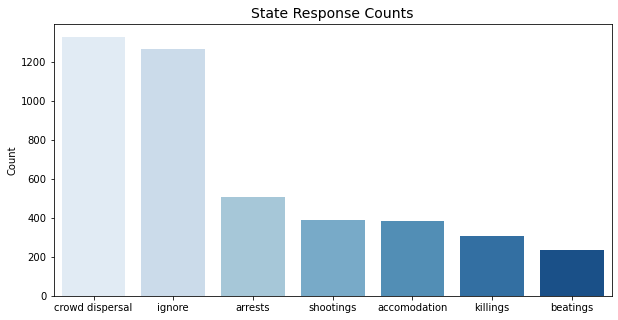

In [58]:
plt.figure(figsize = (10,5))
sns.barplot(y = africa_df[list_of_responses].sum().sort_values(ascending=False),
            x = africa_df[list_of_responses].sum().sort_values(ascending = False).index,
            palette = 'Blues'
            );
plt.title('State Response Counts', fontsize=14 )
plt.ylabel('Count')

# Review demands/responses by country

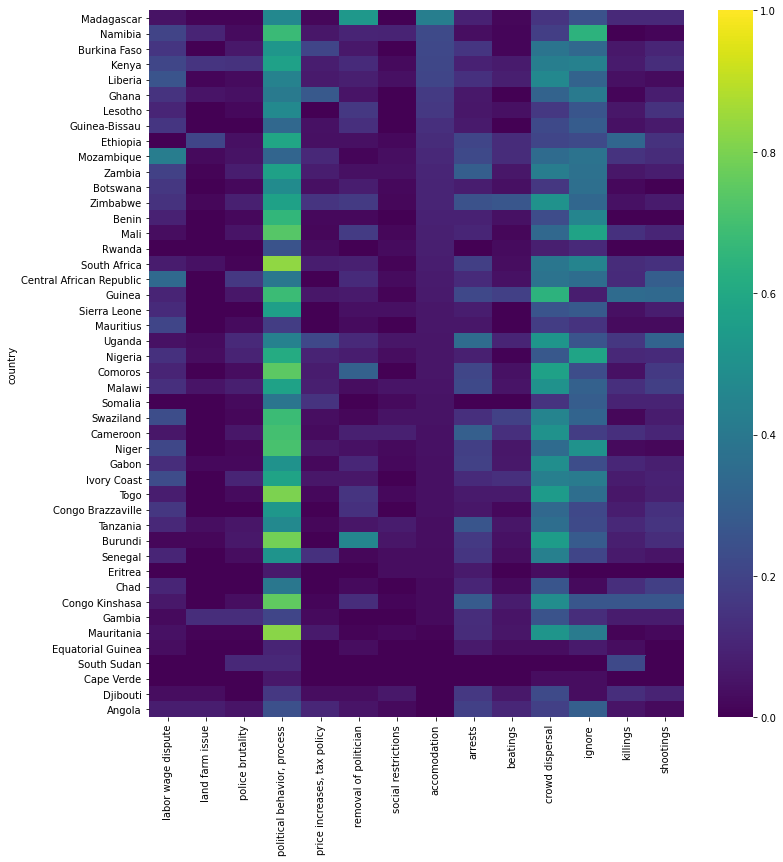

In [59]:
country_demands = pd.concat([africa_df['country'],africa_df[list_of_demands],africa_df[list_of_responses]], axis = 1)
country_demands

df_country = country_demands.groupby('country').mean().sort_values('accomodation', ascending = False)

plt.figure(figsize = (12,13))
sns.heatmap(df_country,
            vmin = 0,
            vmax = 1,
            cmap = 'viridis');

# Plot graphs over time

## Plot by number of protests

<ipython-input-60-45d05c6a5dff>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,3))
<ipython-input-60-45d05c6a5dff>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,3))
<ipython-input-60-45d05c6a5dff>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15

<ipython-input-60-45d05c6a5dff>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,3))


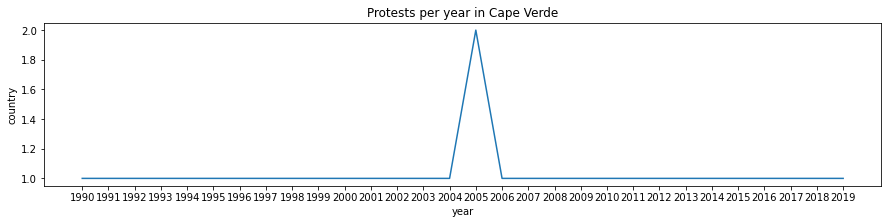

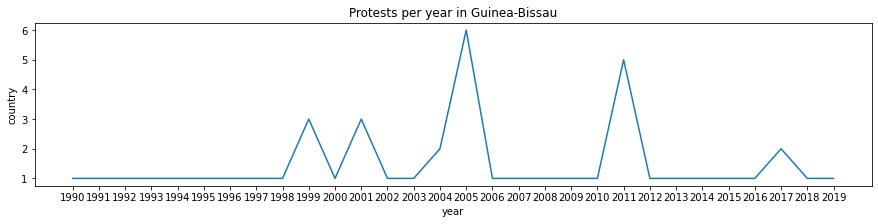

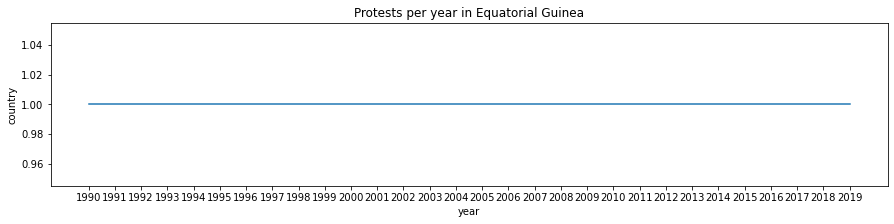

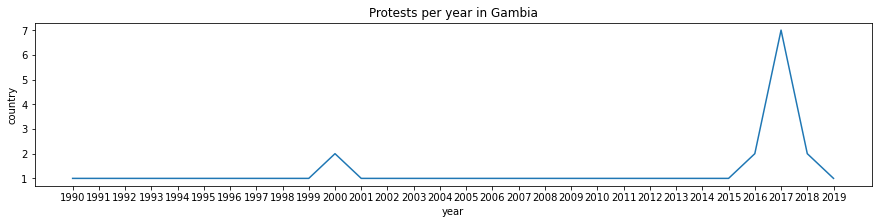

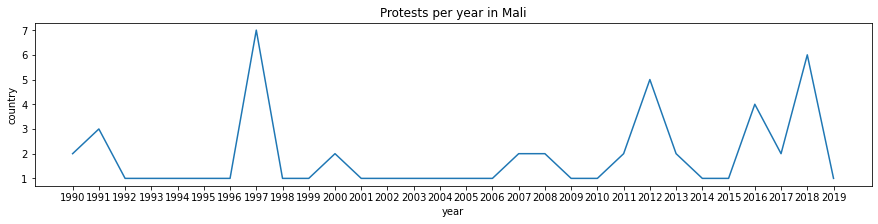

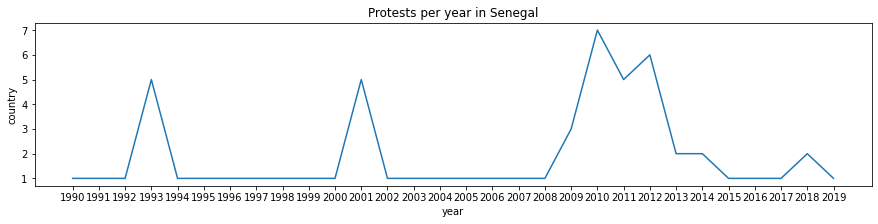

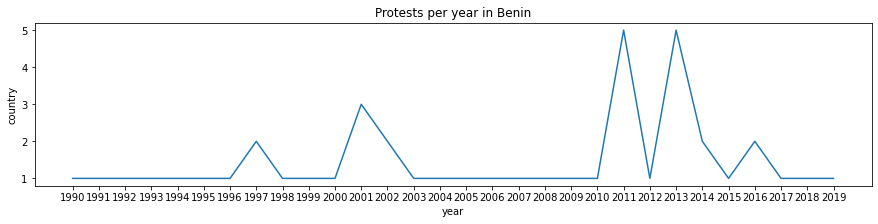

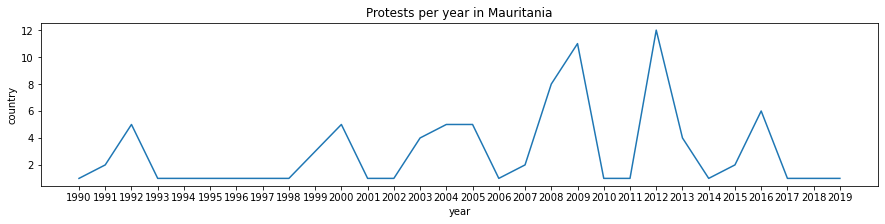

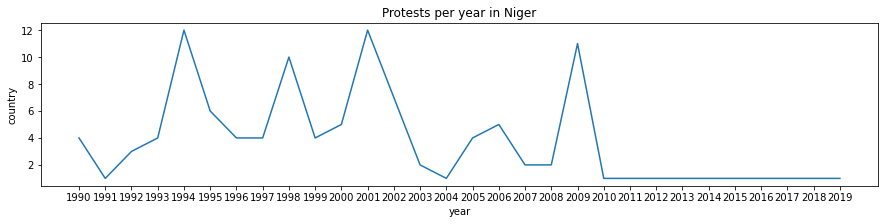

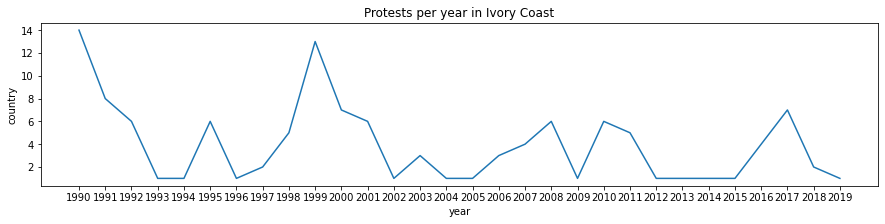

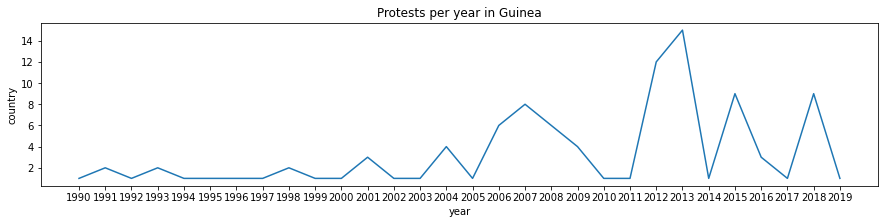

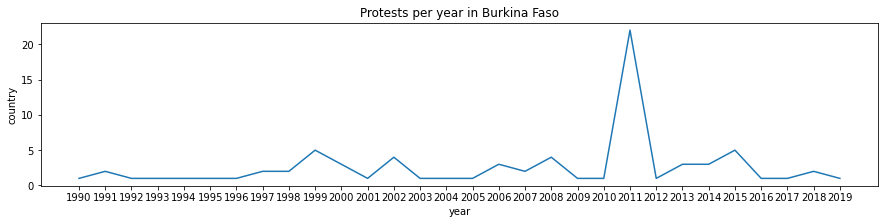

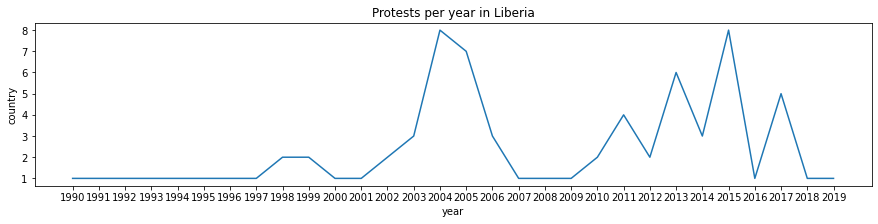

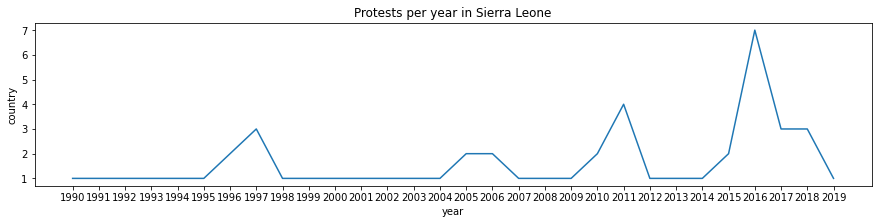

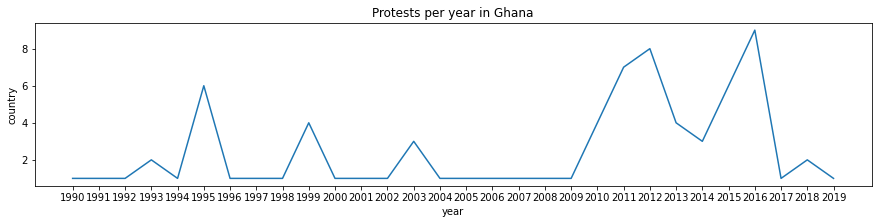

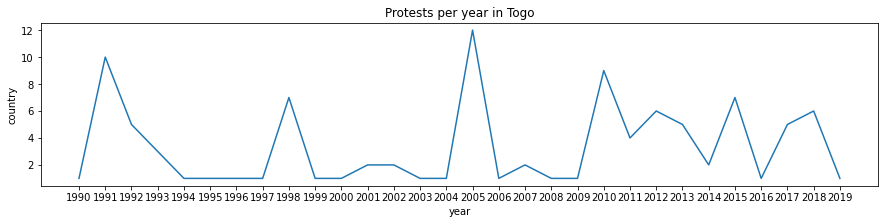

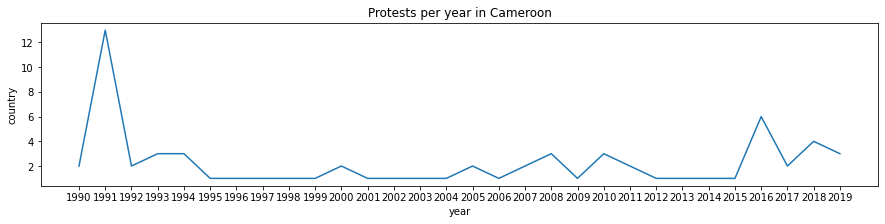

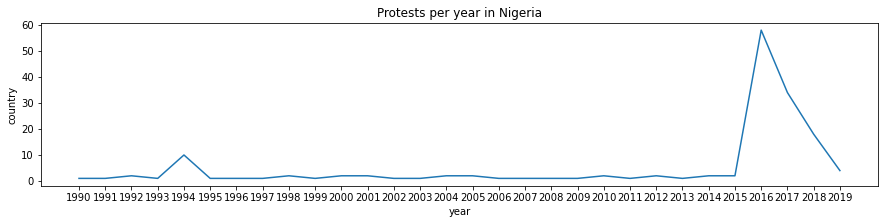

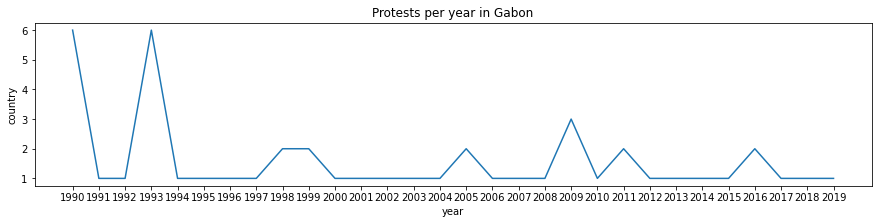

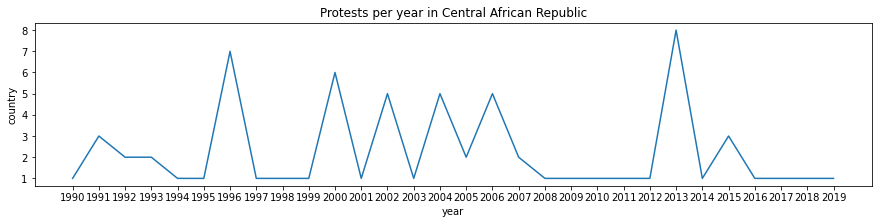

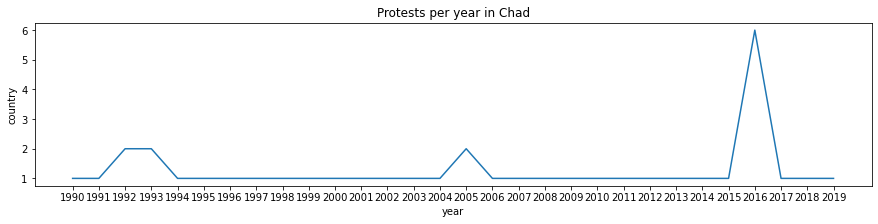

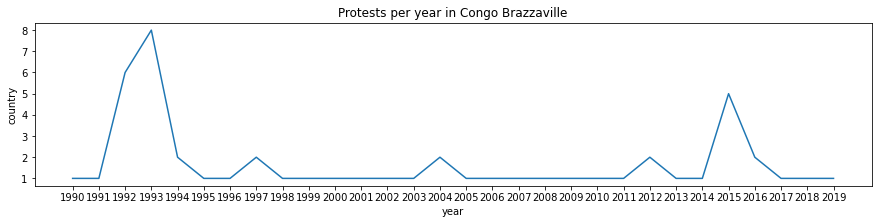

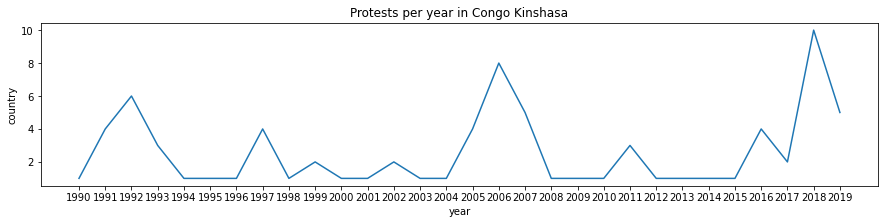

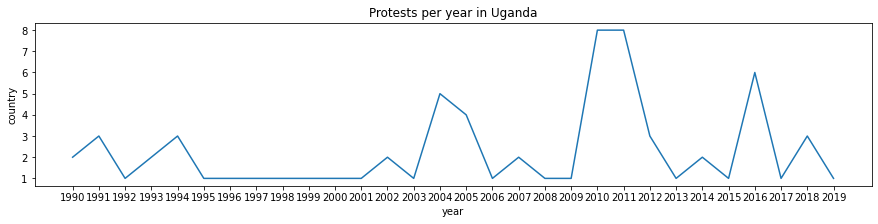

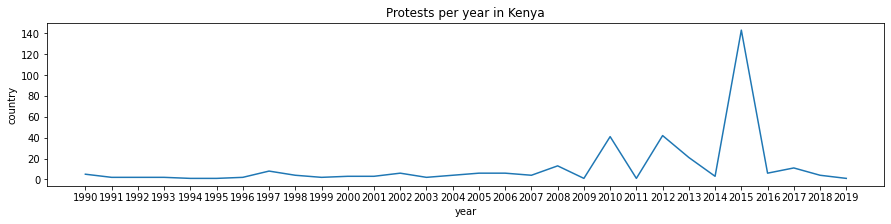

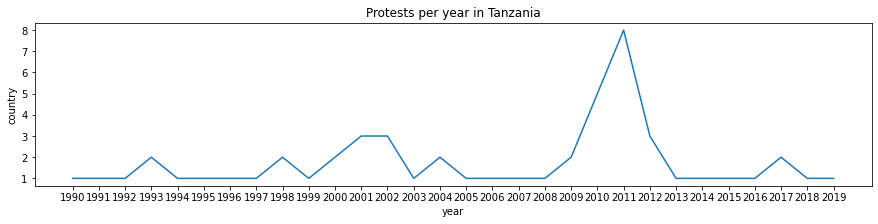

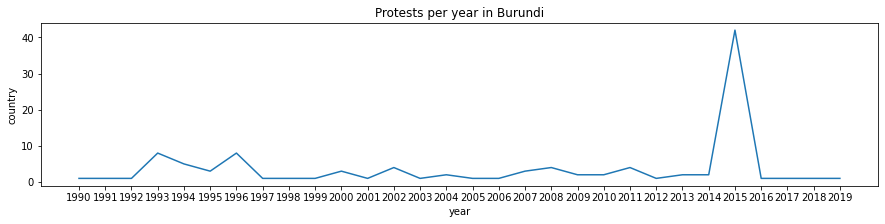

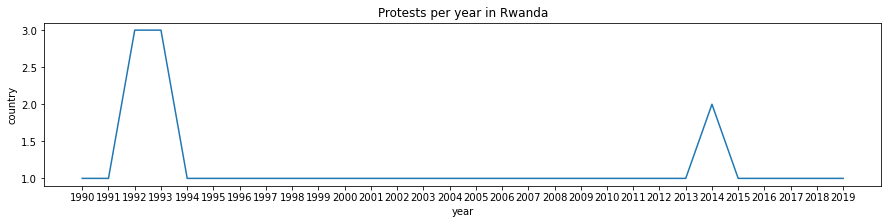

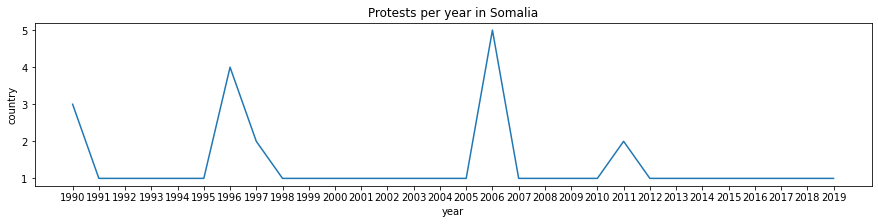

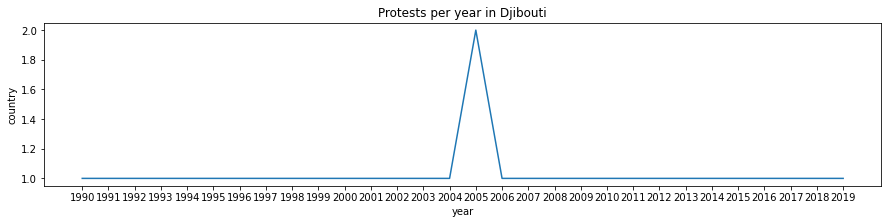

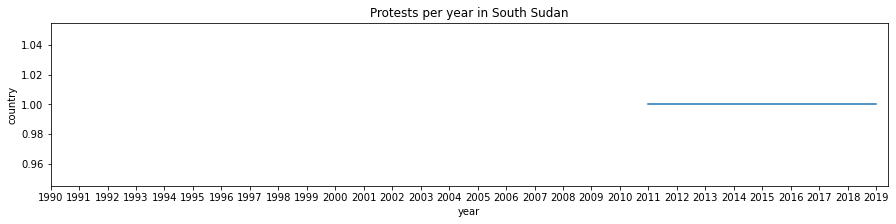

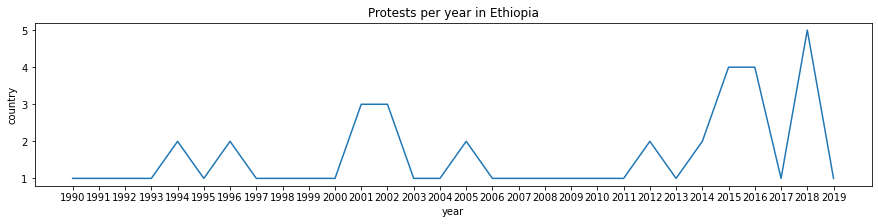

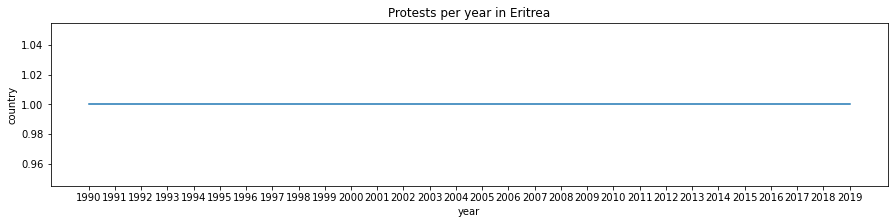

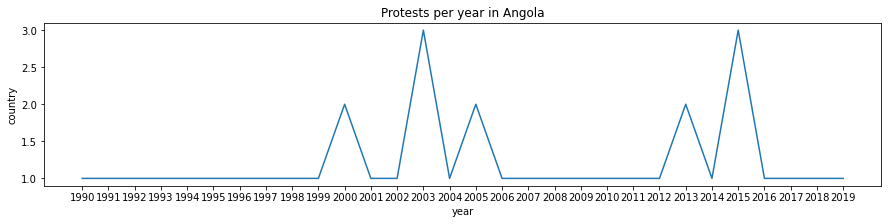

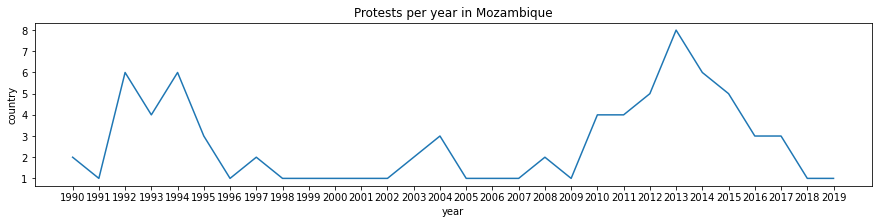

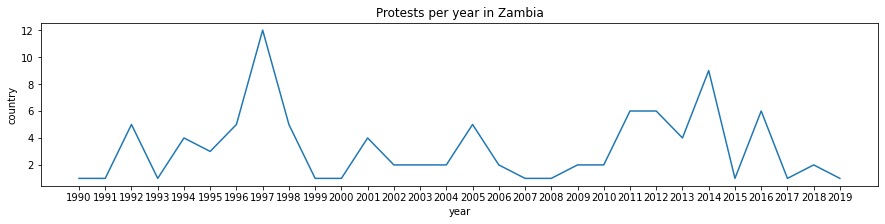

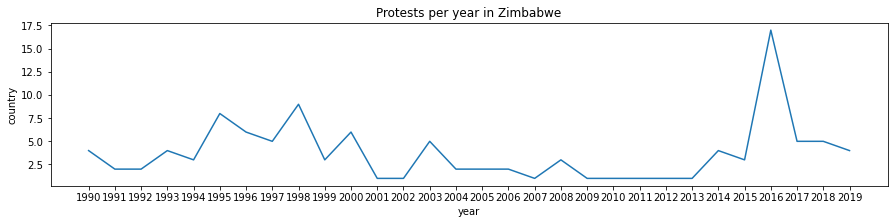

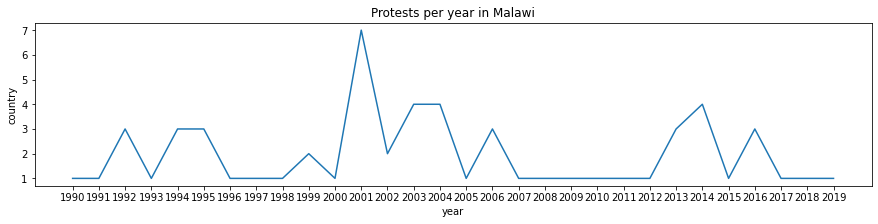

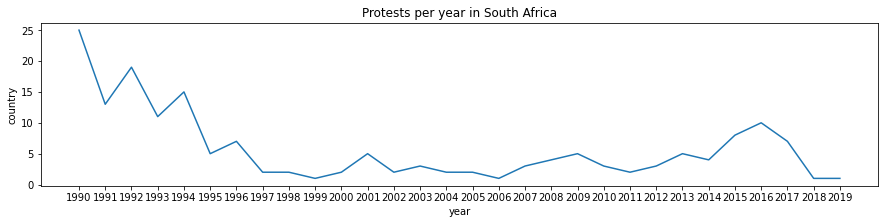

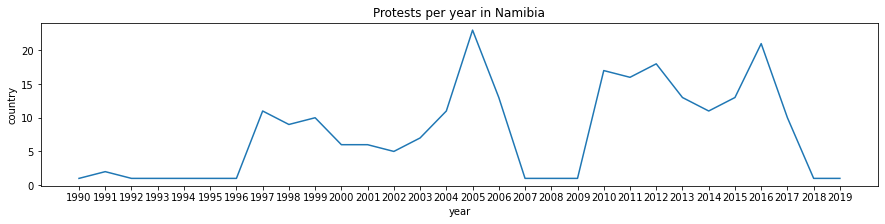

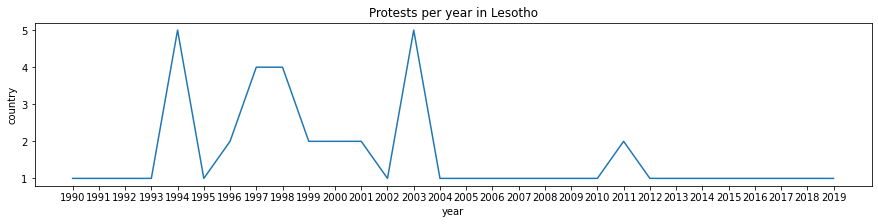

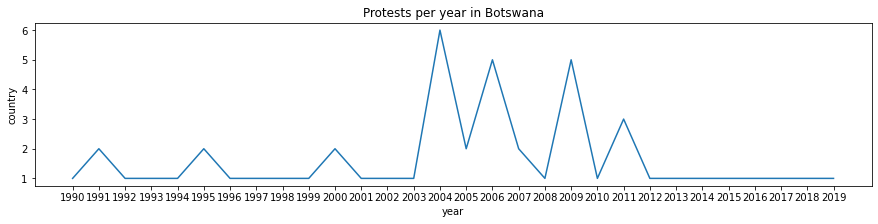

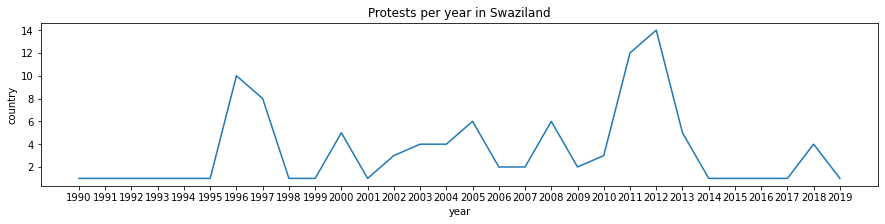

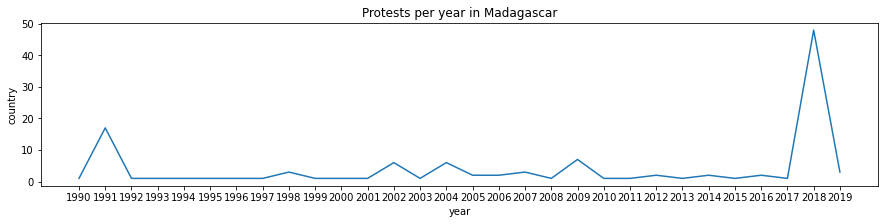

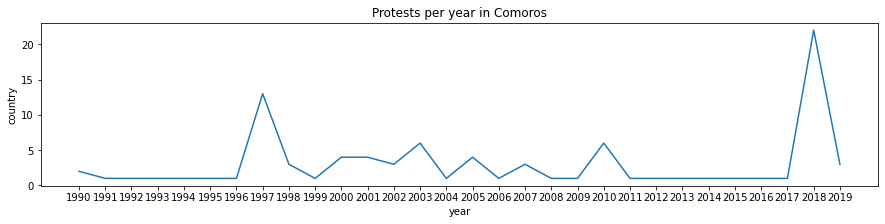

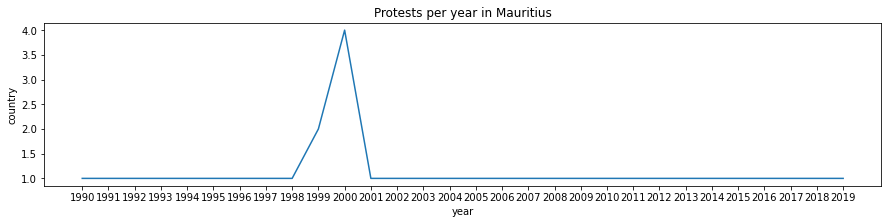

In [60]:
for country in list_of_countries:
    
    data = africa_df[africa_df['country'] == country].groupby('year').count()['country']

    plt.figure(figsize = (15,3))
    sns.lineplot(x = data.index, y = data)
    xticks = list(range(1990,2020,1))
    plt.xticks(xticks,xticks)
    plt.title(f'Protests per year in {country}')

In [61]:
def plot_list_per_year_country(df, list_of_countries, list_to_plot, palette_to_plot):

    for country in list_of_countries:

        df_for_country_bool = (df['country'] == country)
        years_summed = df[df_for_country_bool].groupby('year').sum()
        years_summed_just_demands = years_summed[list_to_plot].sum()

        cols_to_drop = list(years_summed_just_demands[years_summed_just_demands == 0].index)
        data = years_summed[list_to_plot].drop(columns = cols_to_drop)

        plt.figure(figsize = (15,5))
        sns.lineplot(data = data, palette = palette_to_plot, linewidth=2.5)
        plt.xticks(xticks,xticks)
        plt.title(f'Protests per year in {country}')

In [62]:
def plot_list_per_year_region(df, list_of_regions, list_to_plot, palette_to_plot):

    for region in list_of_regions:

        df_for_region_bool = (df['region'] == region)
        years_summed = df[df_for_region_bool].groupby('year').sum()
        years_summed_just_demands = years_summed[list_to_plot].sum()

        cols_to_drop = list(years_summed_just_demands[years_summed_just_demands == 0].index)
        data = years_summed[list_to_plot].drop(columns = cols_to_drop)

        plt.figure(figsize = (15,5))
        sns.lineplot(data = data, palette = palette_to_plot, linewidth=2.5)
        plt.xticks(xticks,xticks)
        plt.title(f'Protests per year in {region}')

In [63]:
demands_palette = {'labor wage dispute':'red',
           'land farm issue': 'hotpink',
           'police brutality': 'blue',
           'political behavior, process': 'green',
           'price increases, tax policy': 'darkorange',
           'removal of politician': 'gold',
           'social restrictions': 'purple'}

response_palette = {'accomodation':'green',
           'arrests': 'darkorange',
           'beatings': 'hotpink',
           'crowd dispersal': 'gold',
           'ignore': 'blue',
           'killings': 'red',
           'shootings': 'purple'}

## Plot by demands

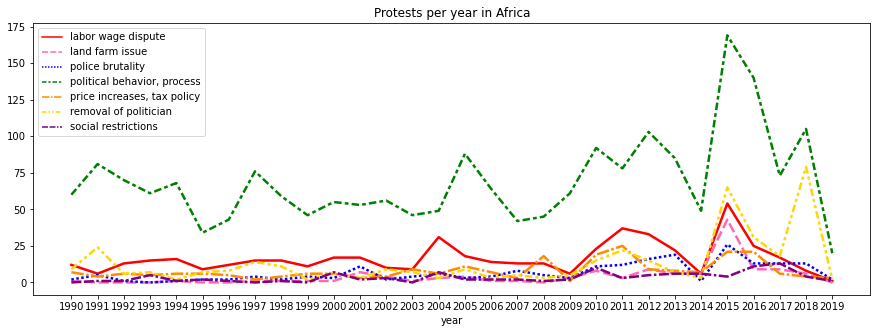

In [64]:
plot_list_per_year_region(africa_df, ['Africa'], list_of_demands, demands_palette)

<ipython-input-61-4d3f370430e8>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,5))
<ipython-input-61-4d3f370430e8>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,5))
<ipython-input-61-4d3f370430e8>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = 

<ipython-input-61-4d3f370430e8>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,5))


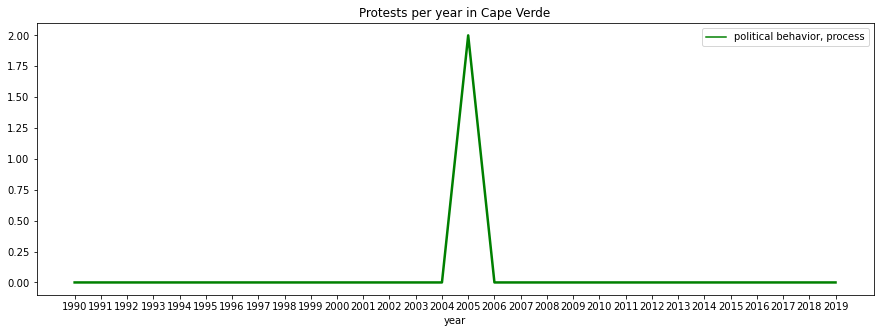

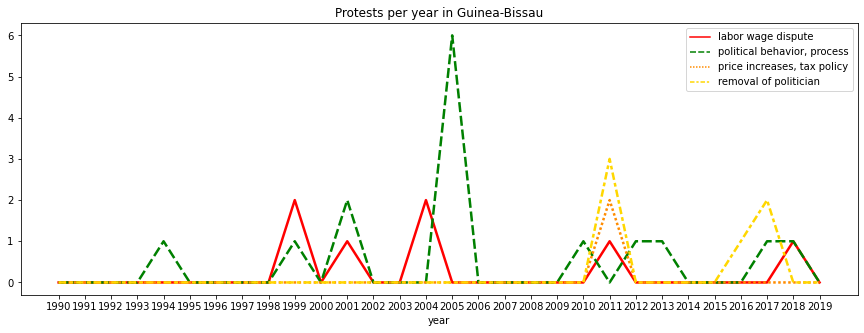

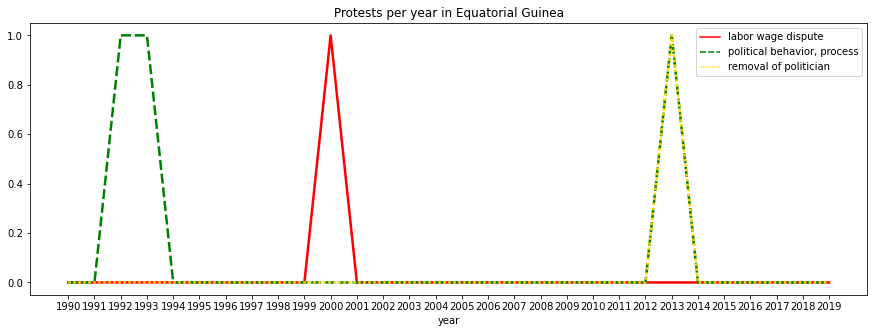

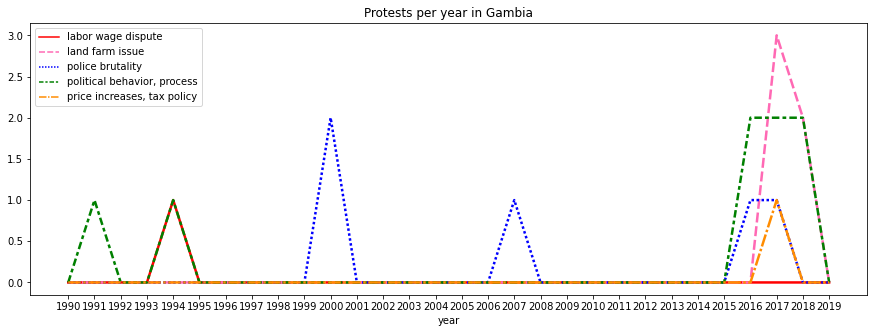

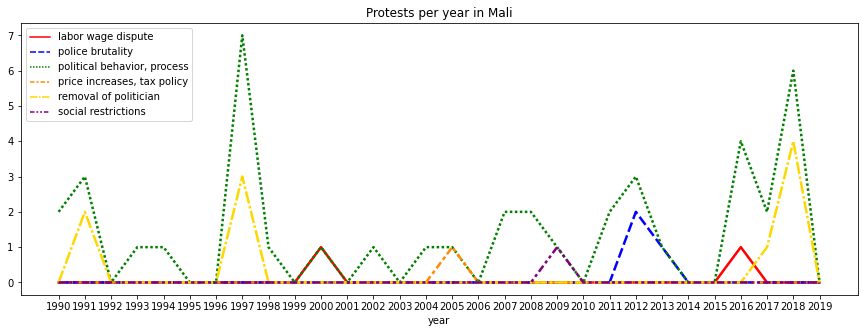

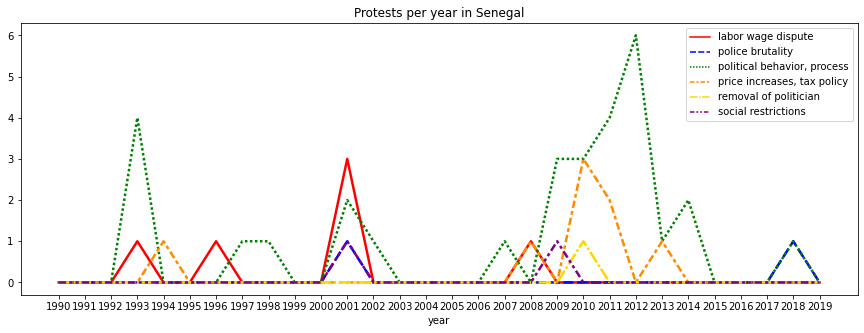

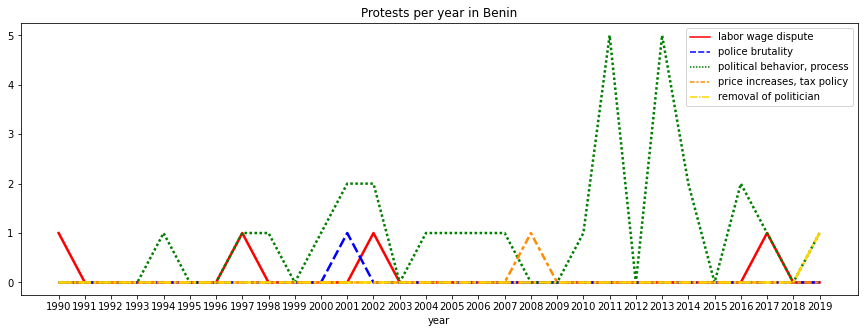

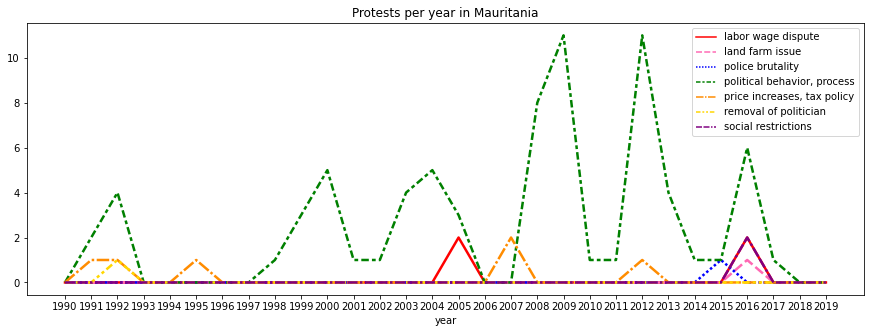

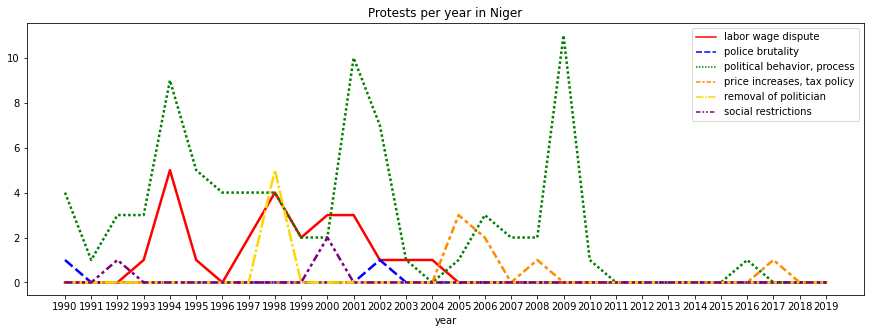

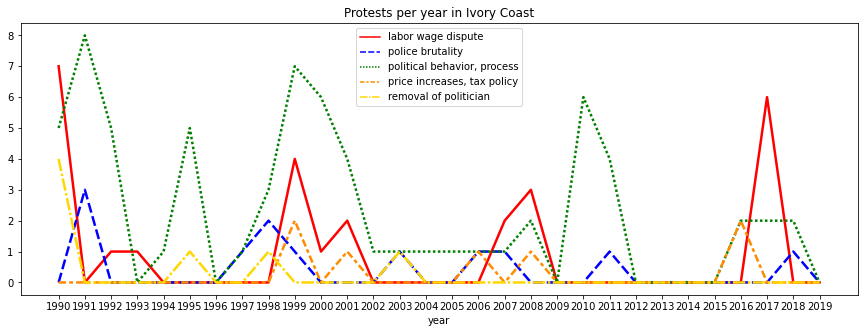

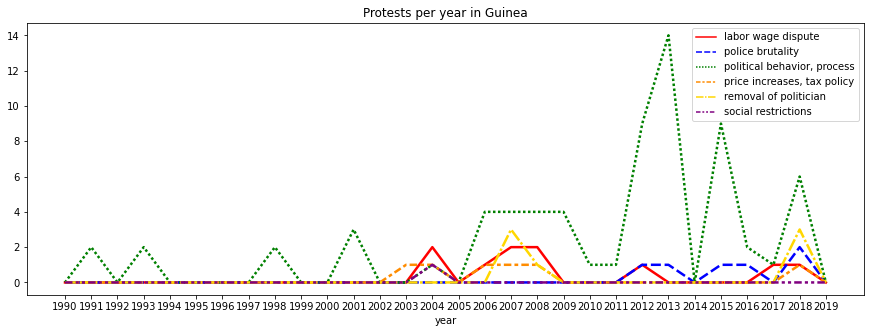

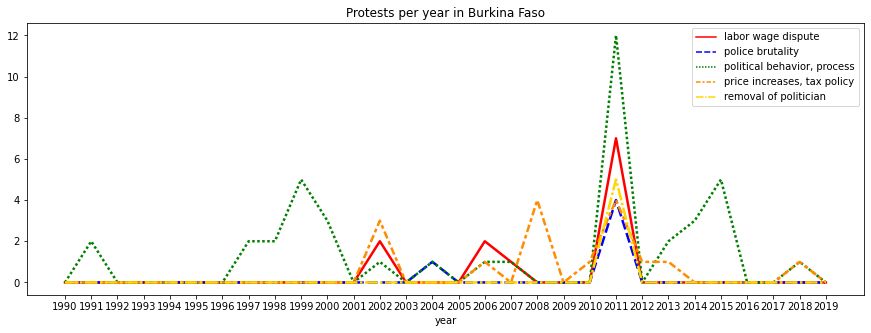

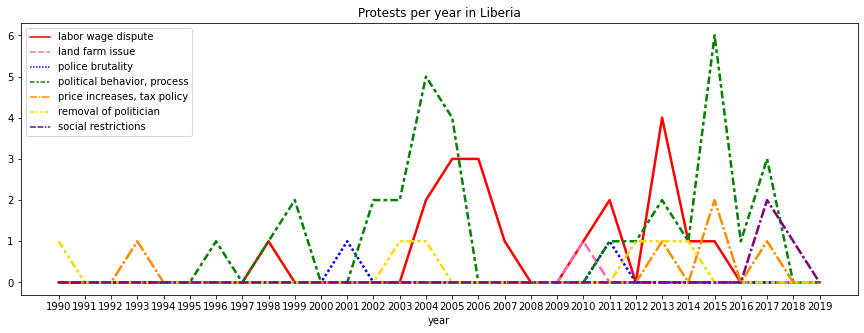

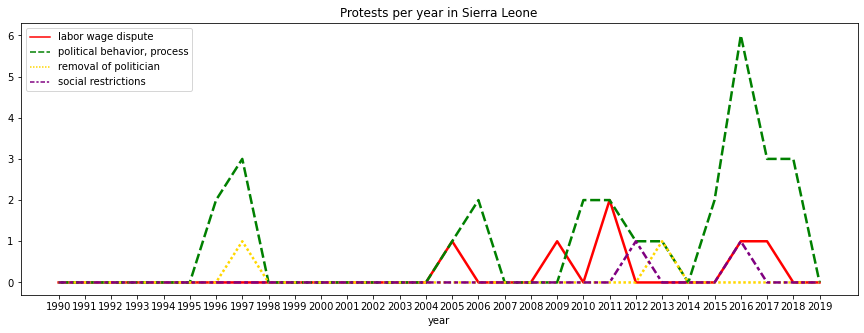

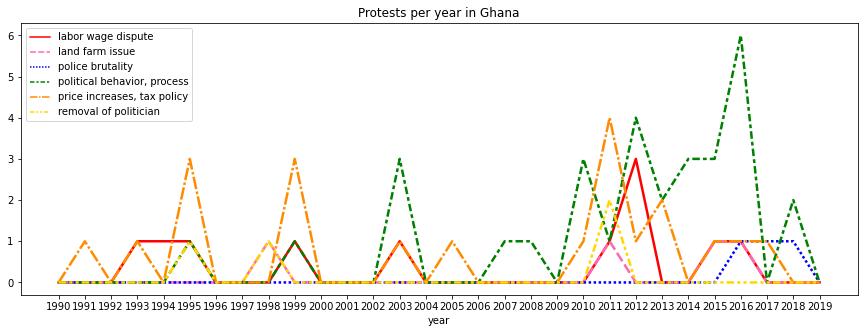

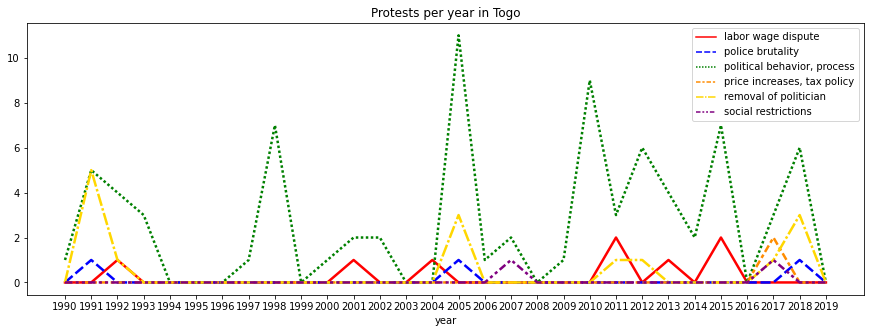

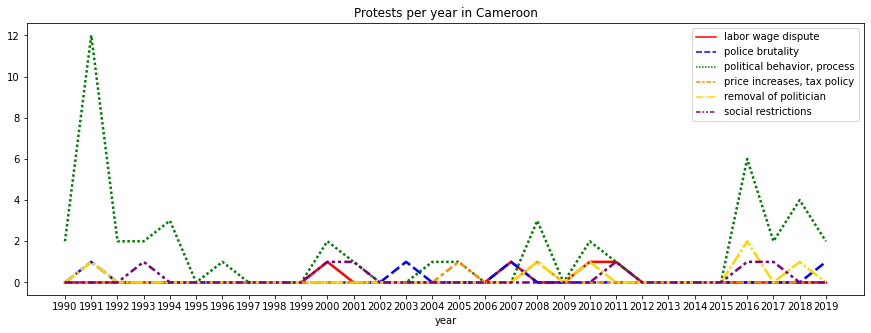

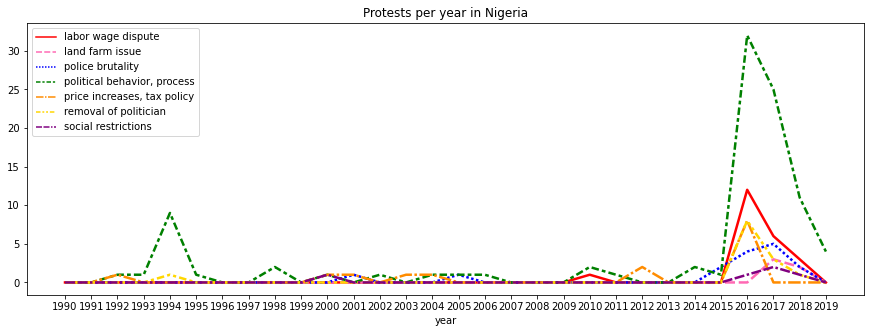

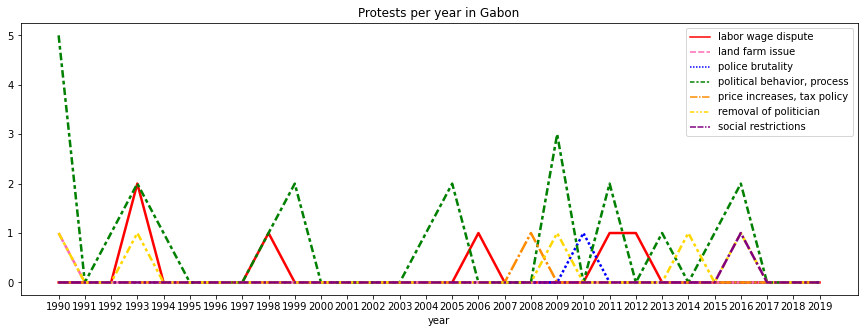

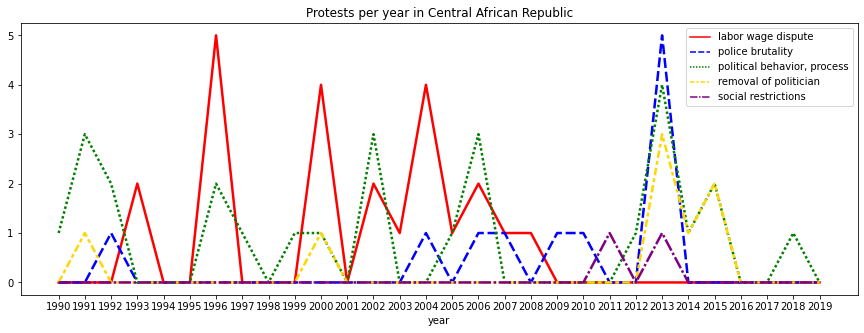

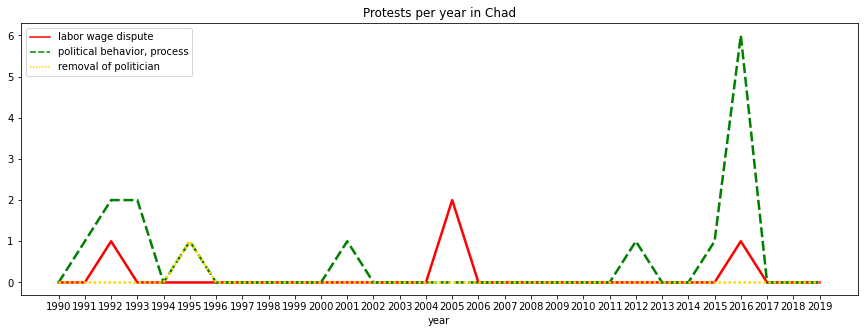

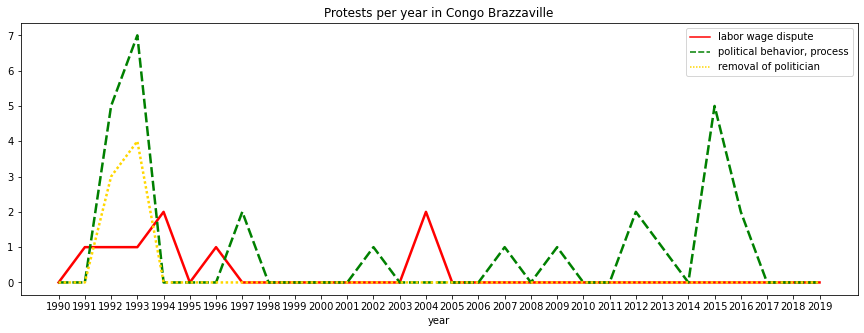

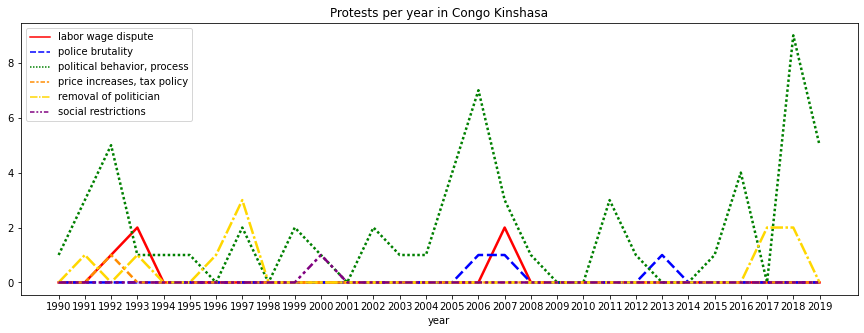

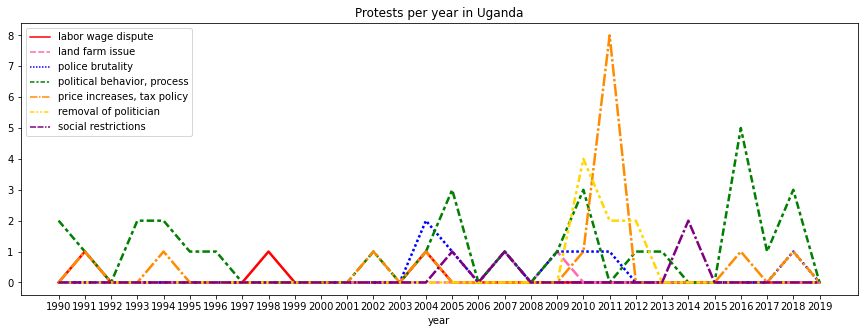

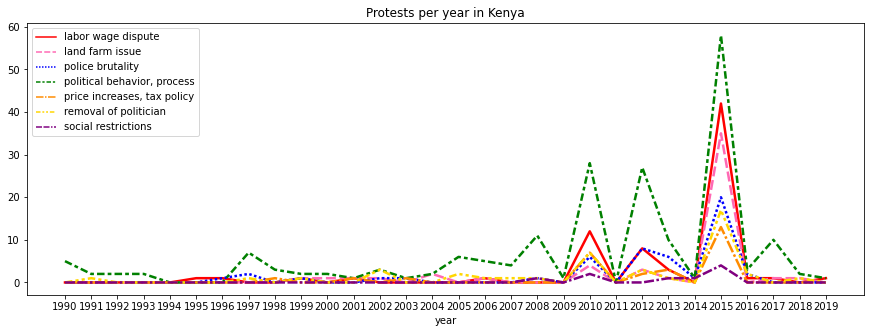

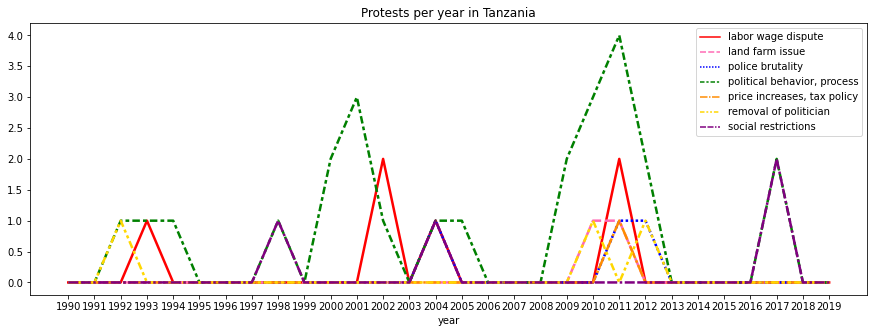

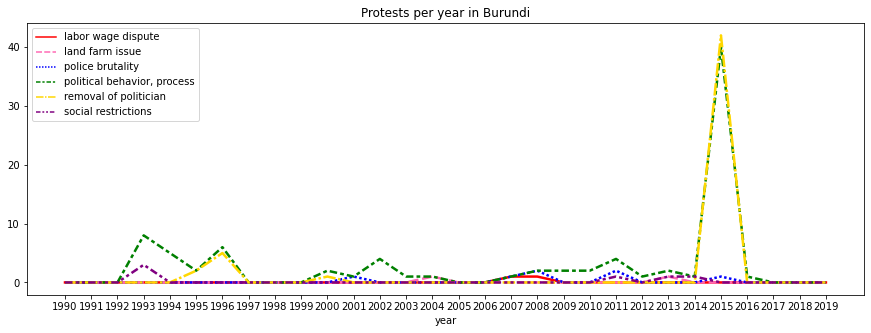

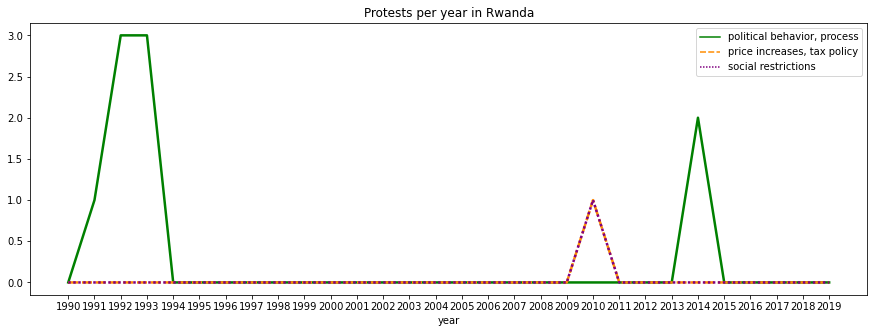

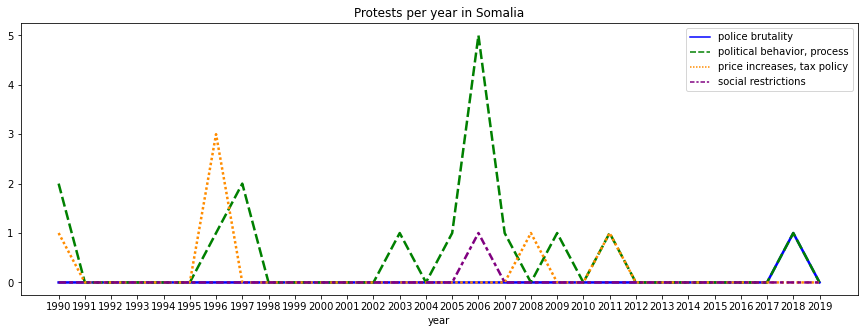

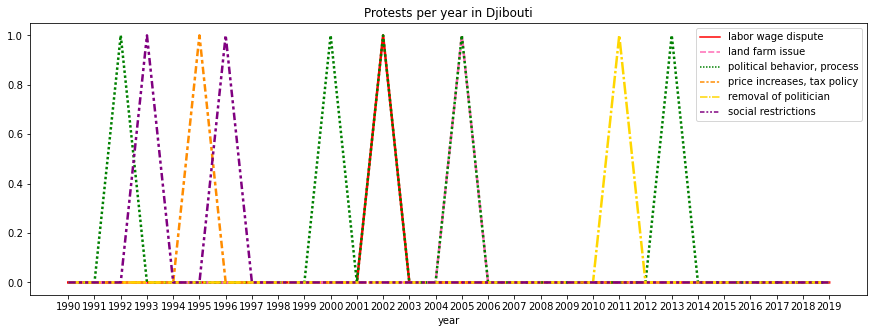

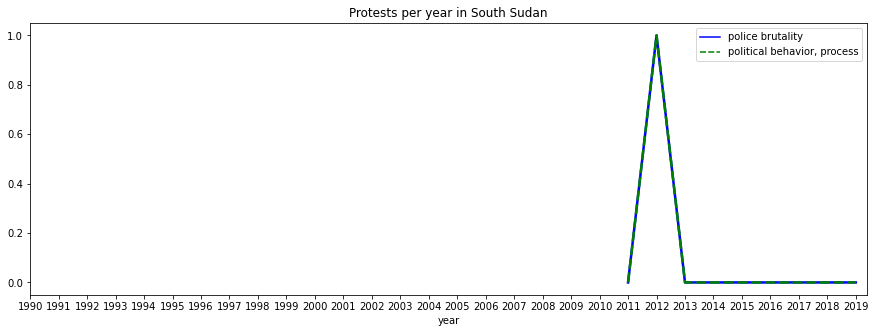

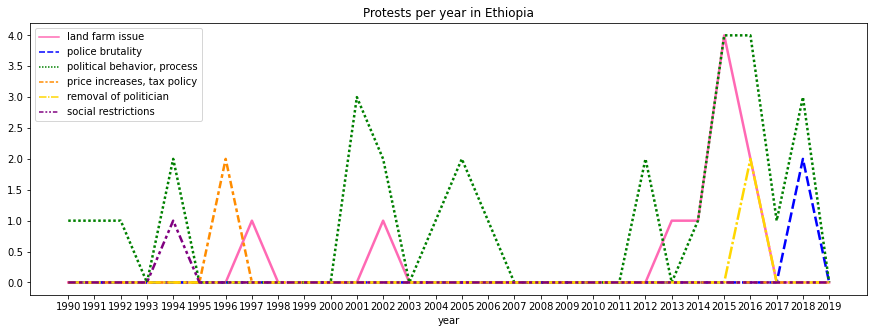

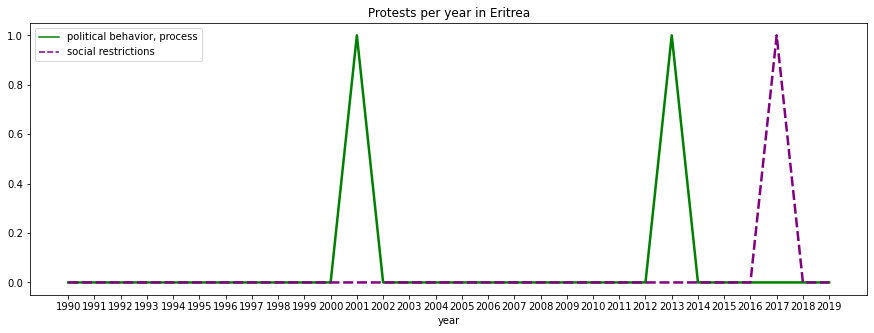

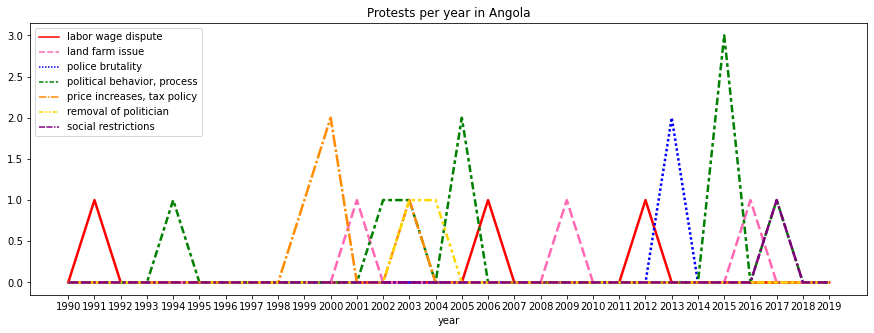

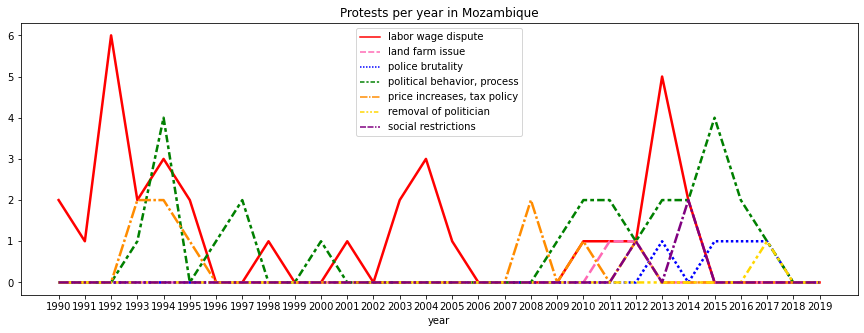

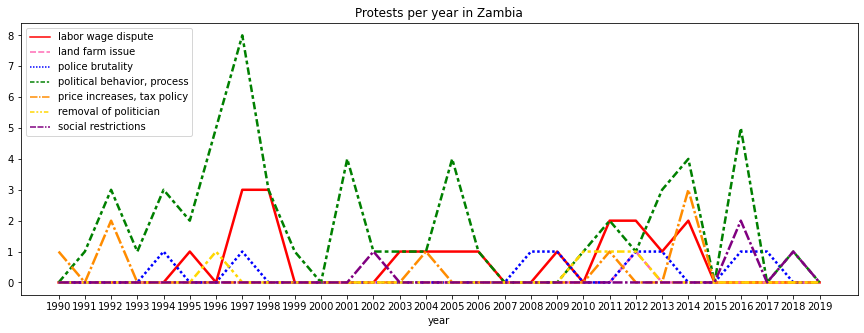

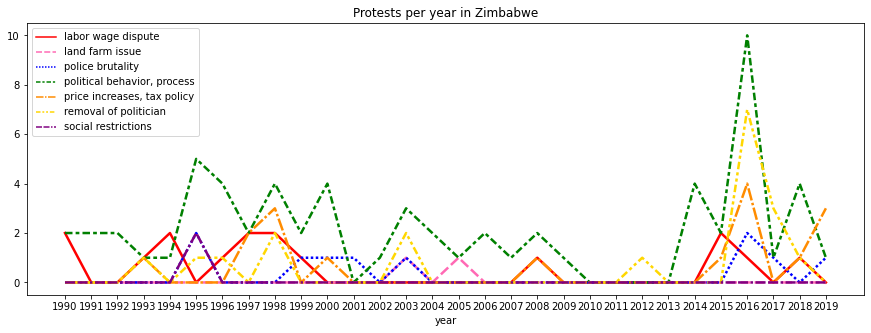

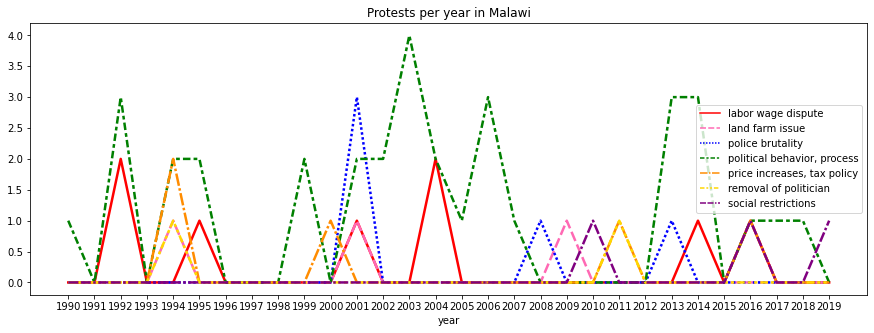

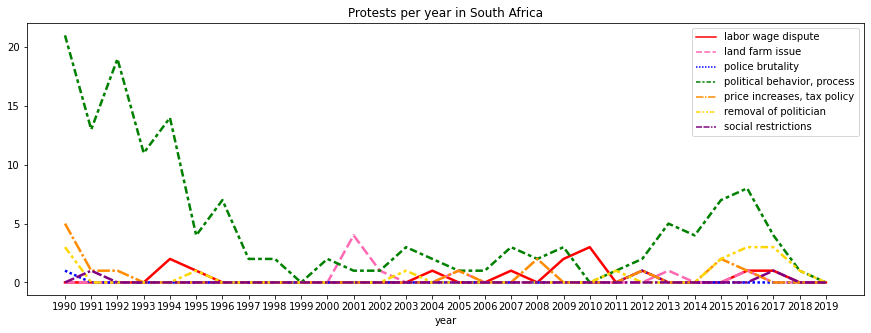

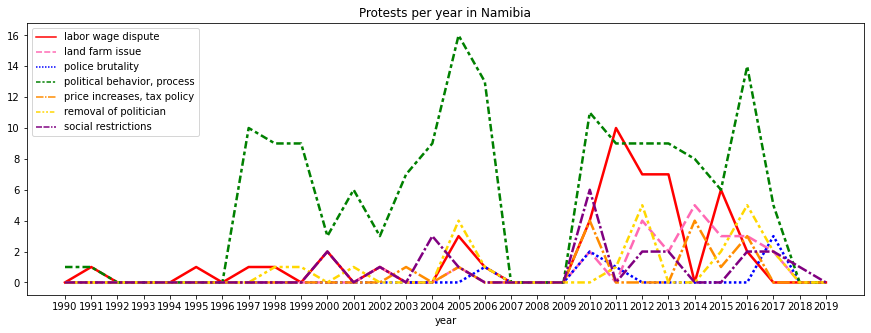

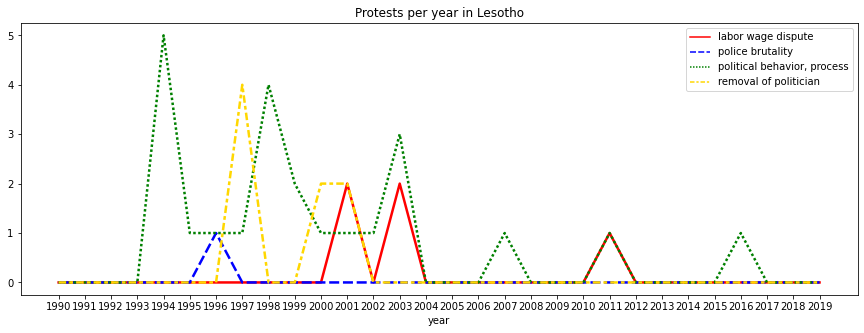

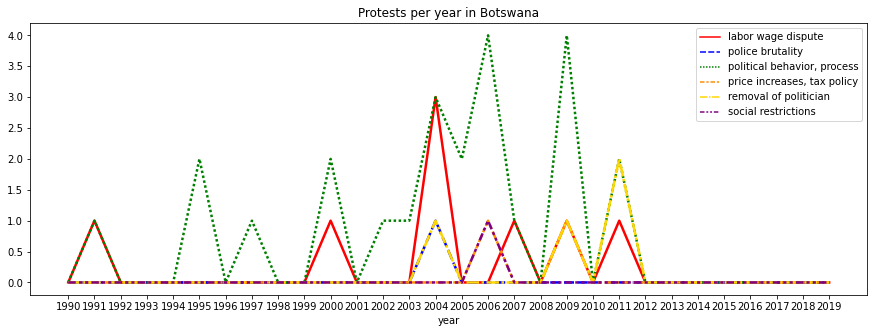

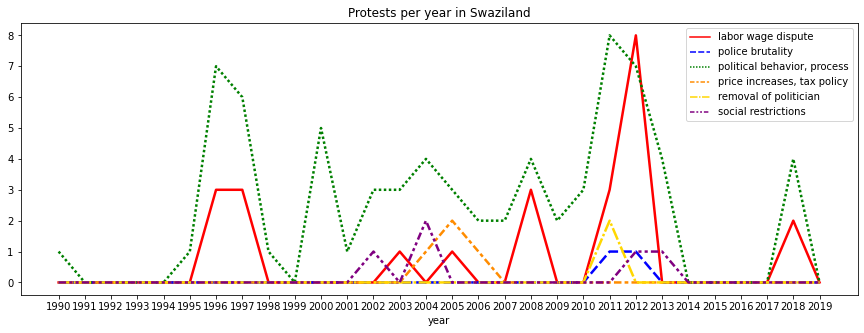

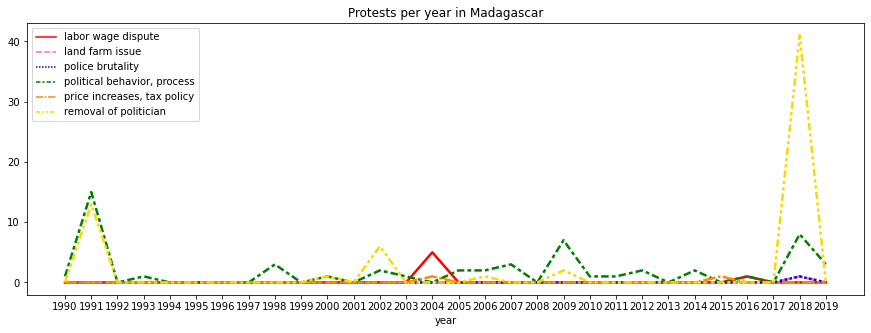

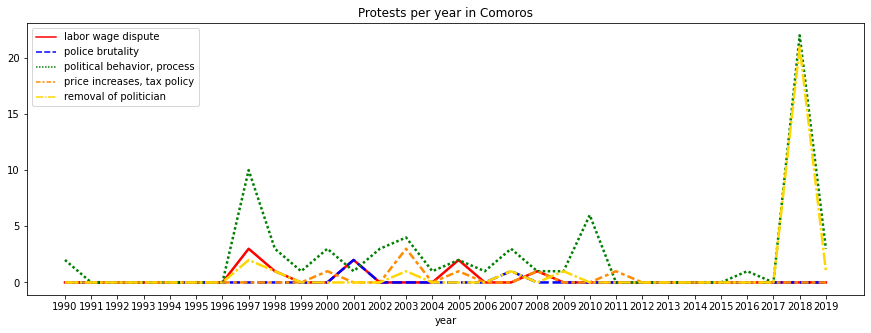

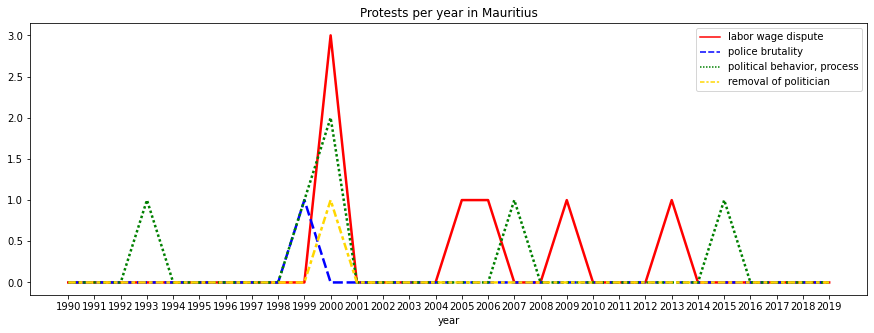

In [65]:
plot_list_per_year_country(africa_df, list_of_countries, list_of_demands, demands_palette)

## Plot by responses

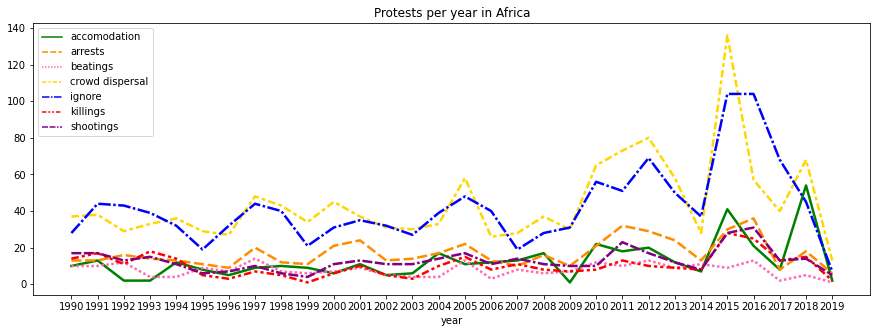

In [66]:
plot_list_per_year_region(africa_df, ['Africa'], list_of_responses, response_palette)

<ipython-input-61-4d3f370430e8>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,5))
<ipython-input-61-4d3f370430e8>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,5))
<ipython-input-61-4d3f370430e8>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = 

<ipython-input-61-4d3f370430e8>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,5))


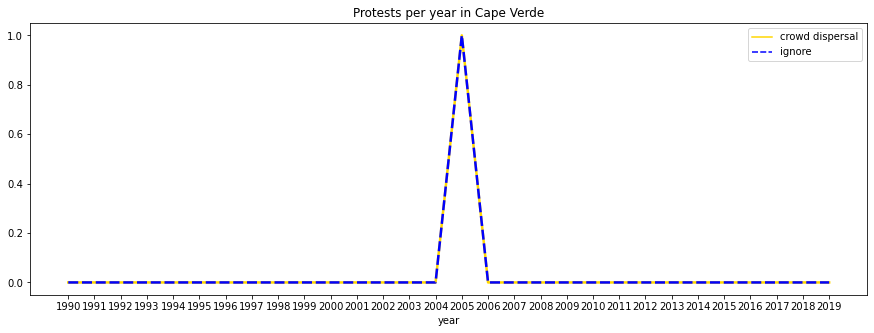

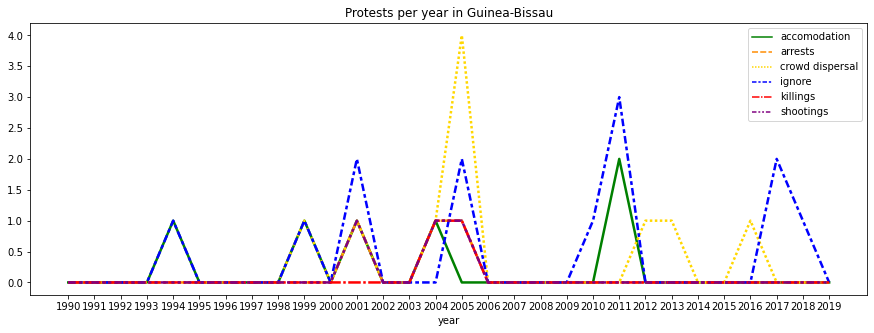

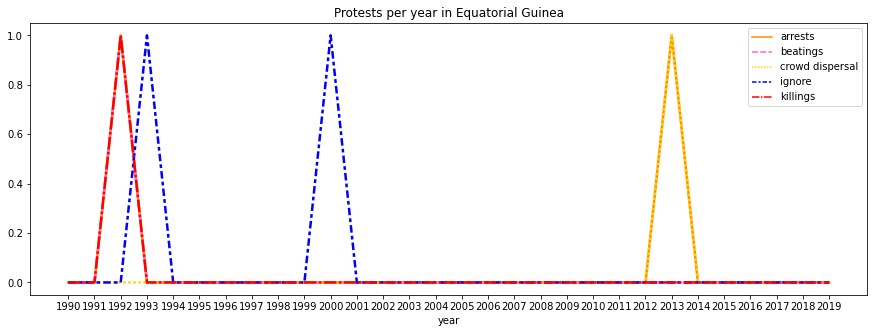

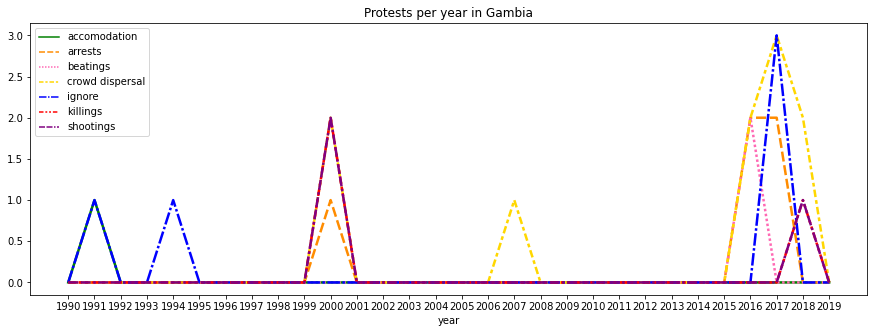

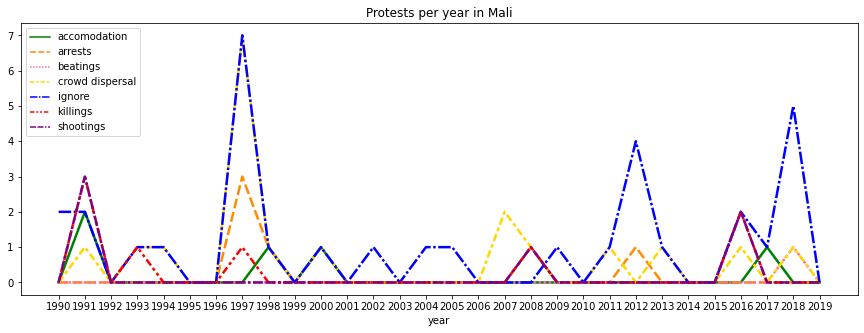

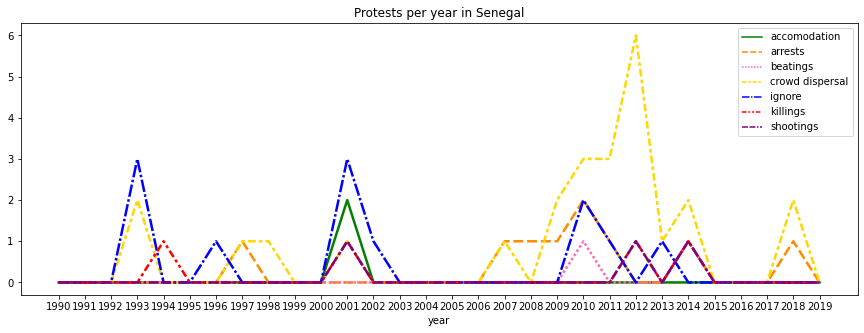

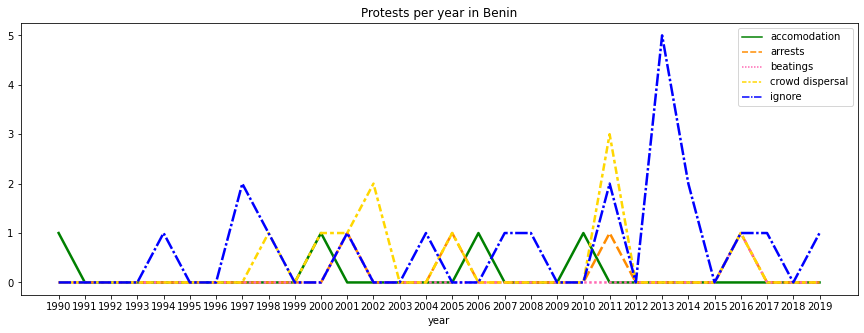

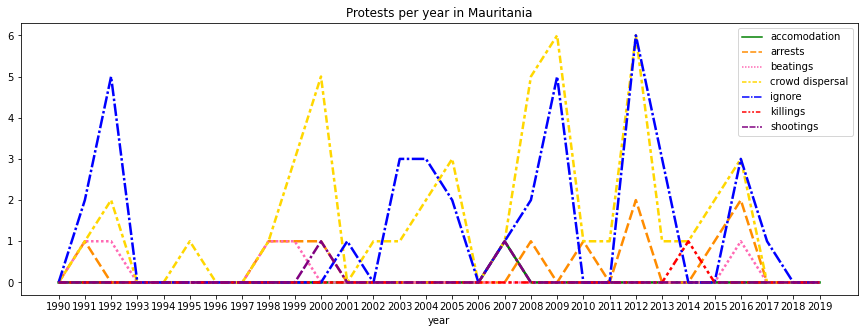

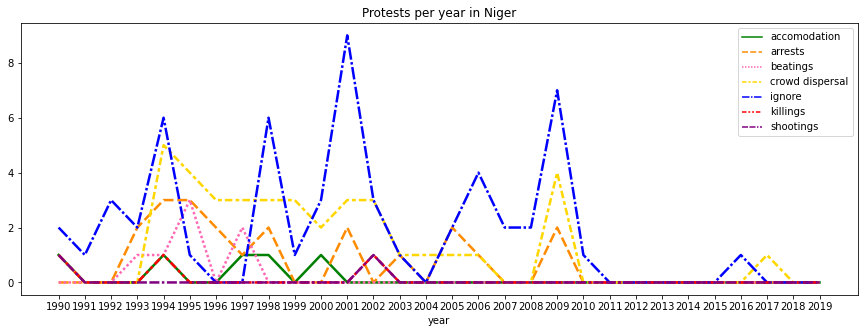

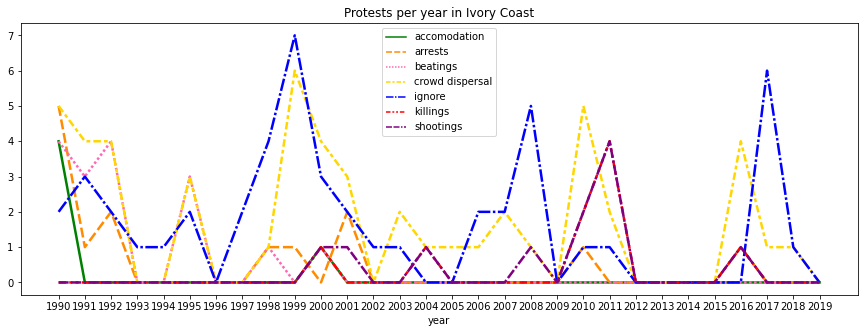

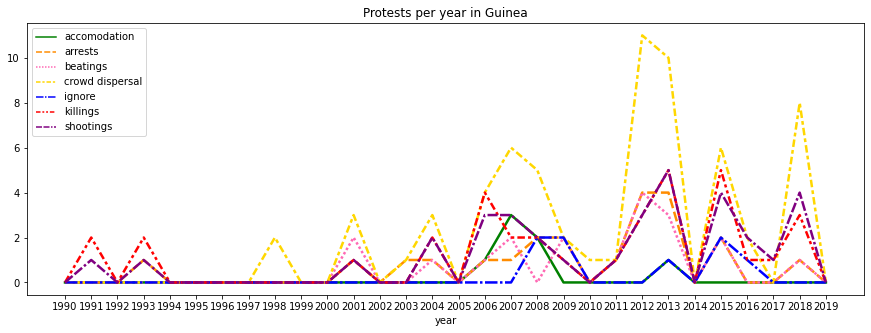

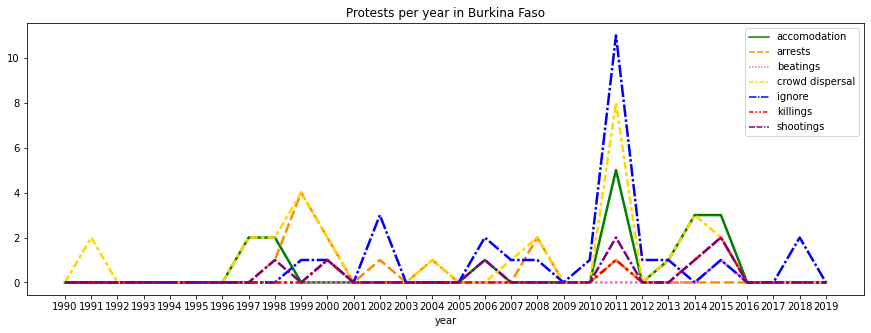

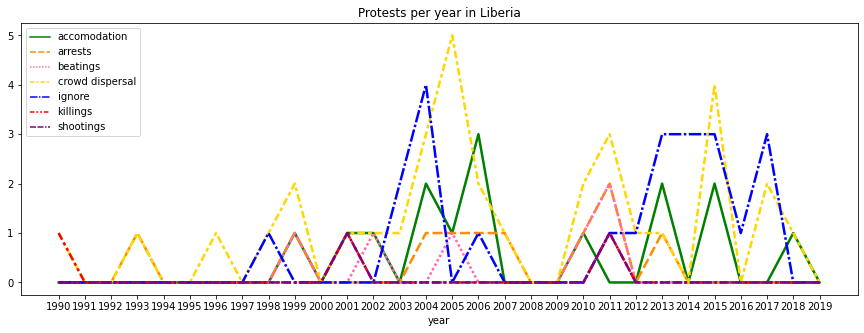

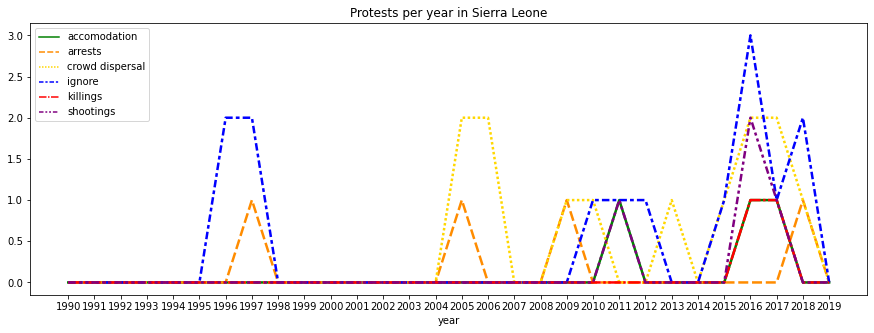

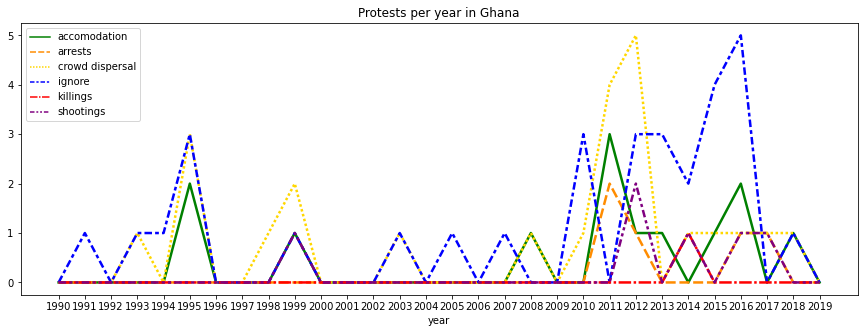

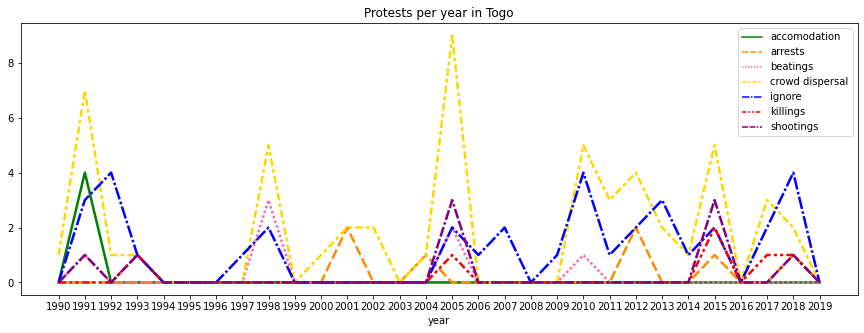

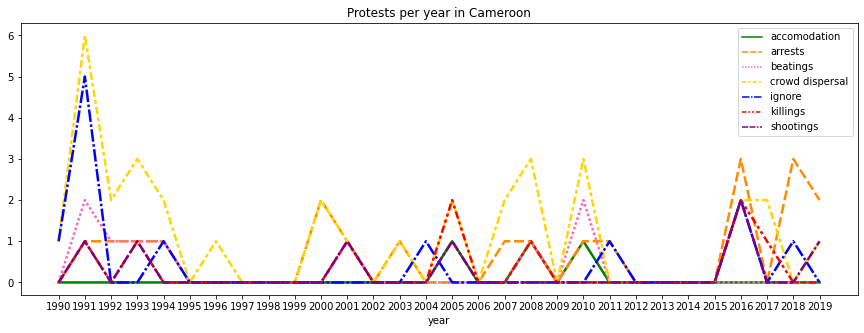

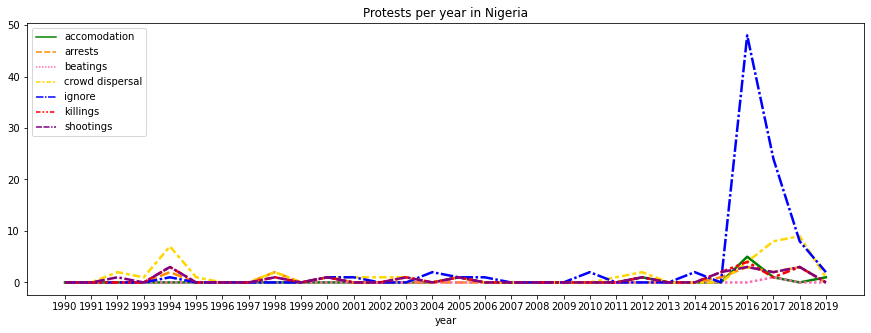

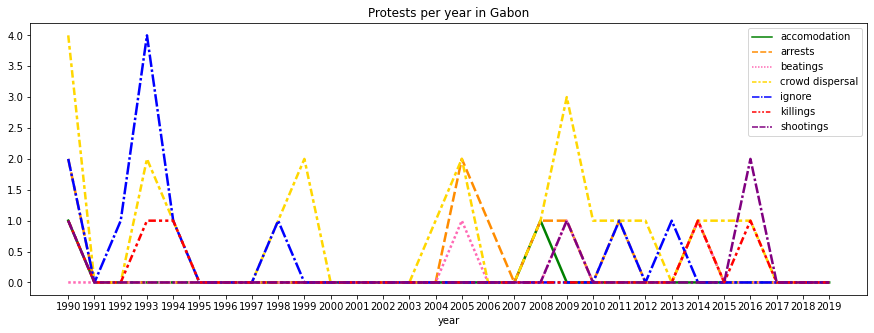

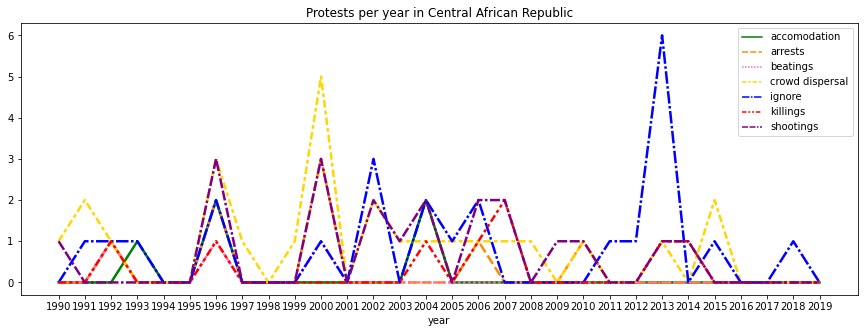

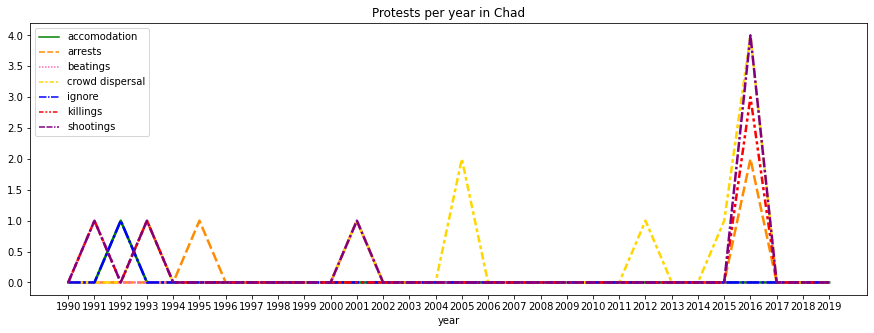

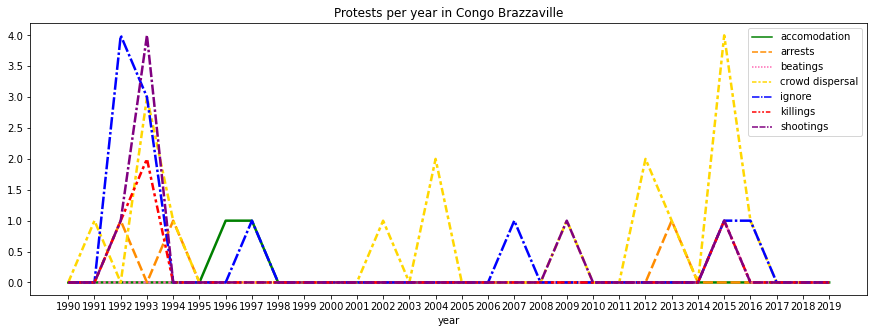

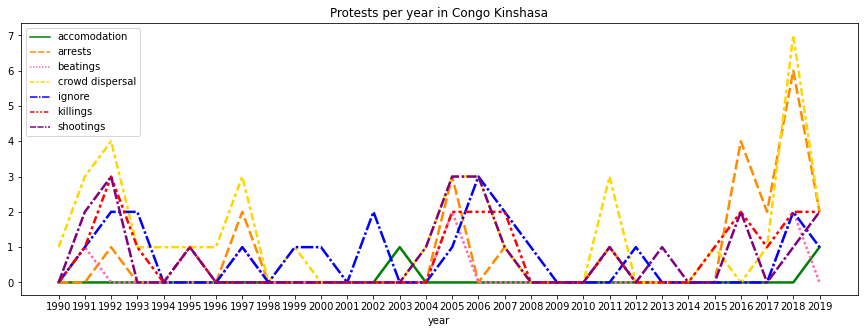

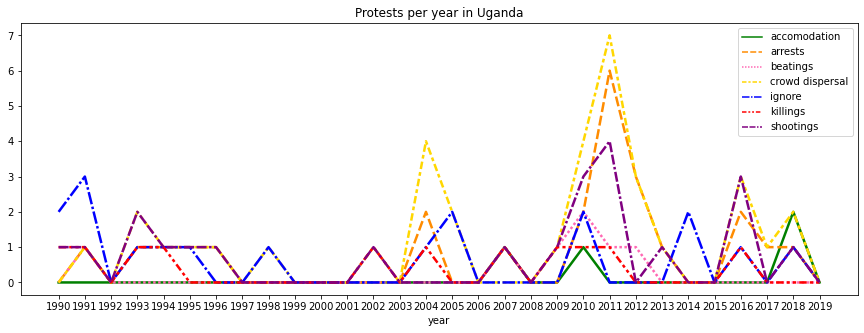

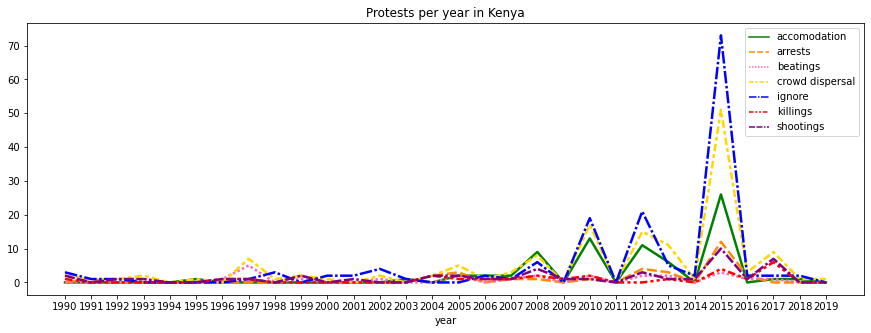

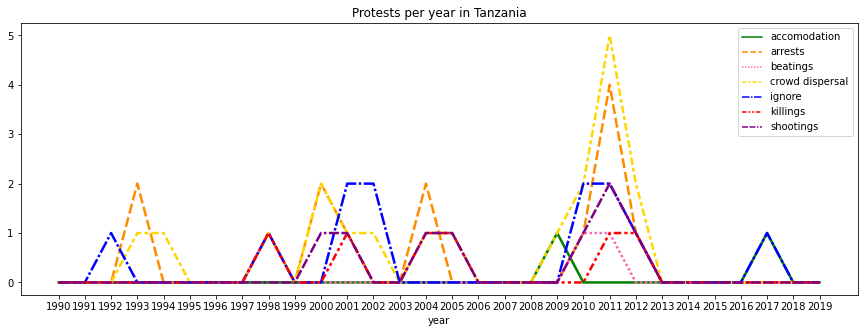

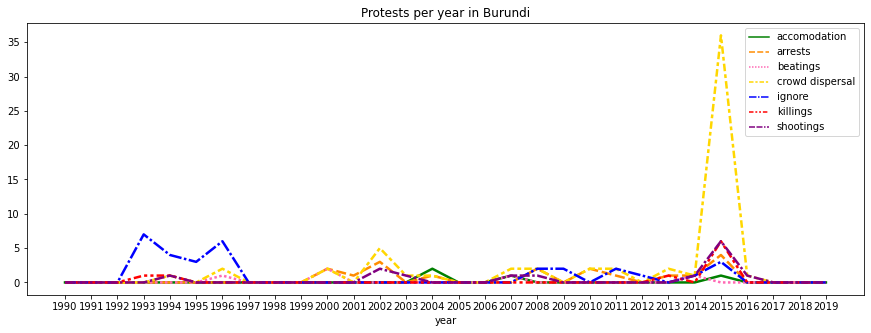

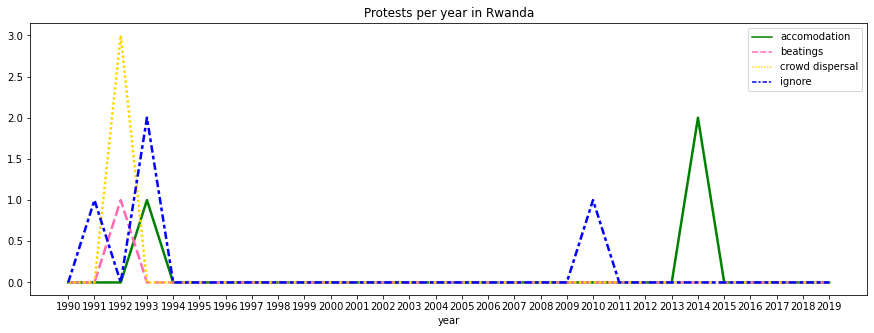

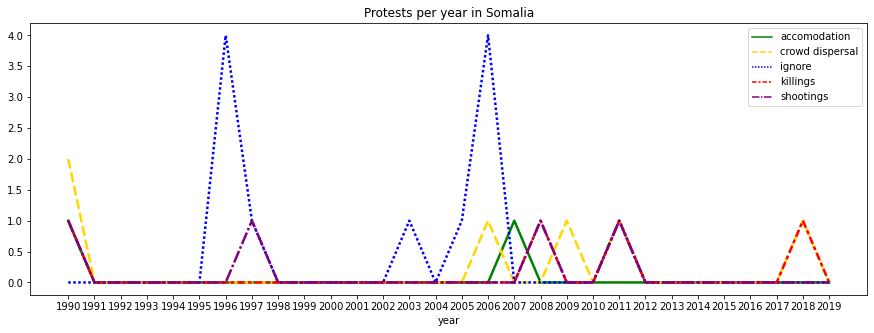

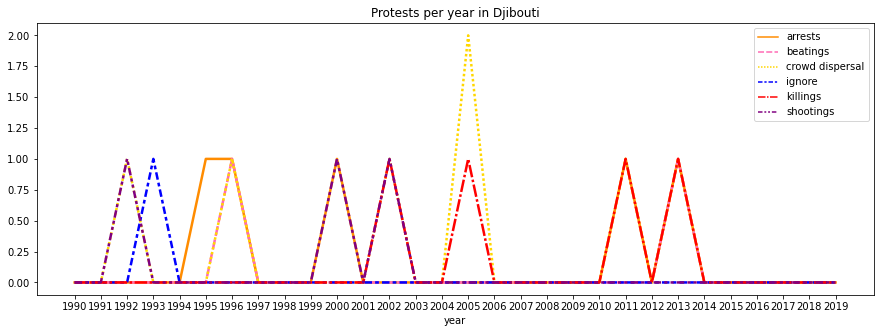

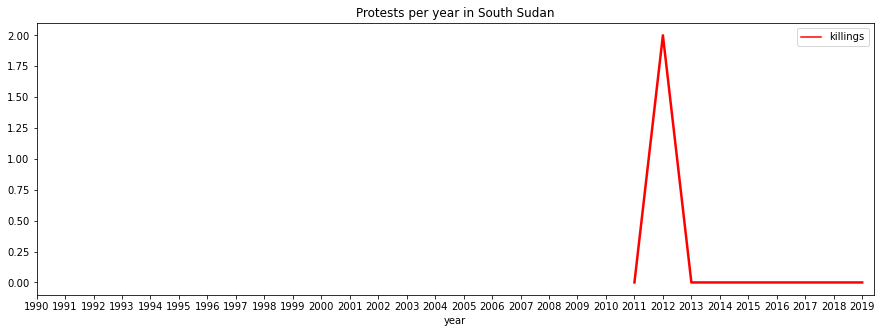

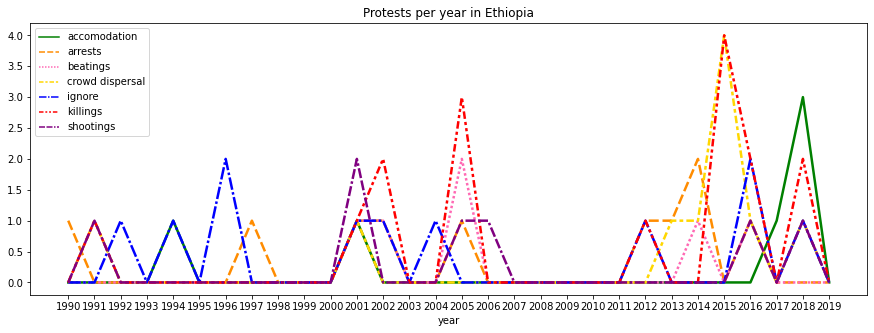

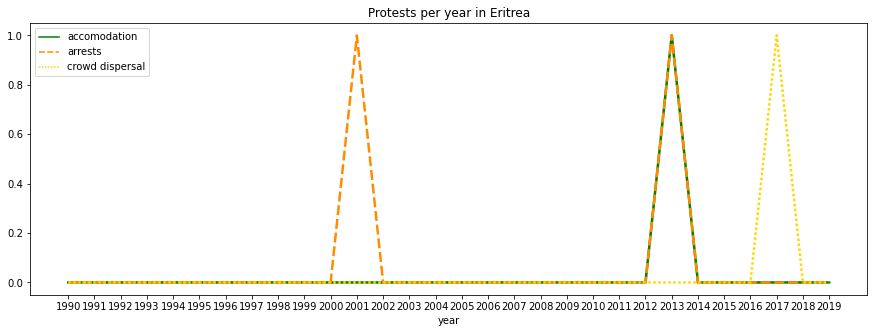

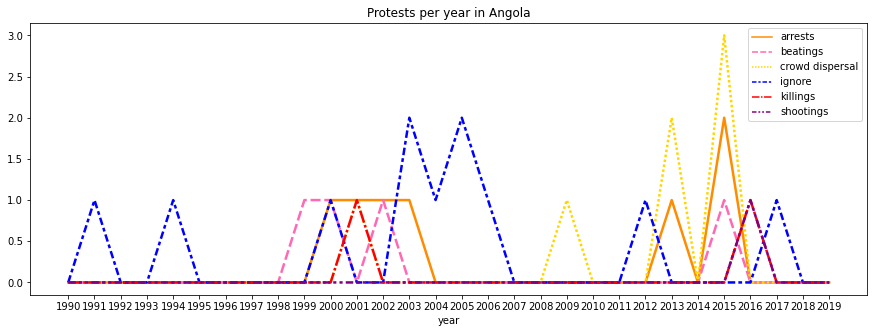

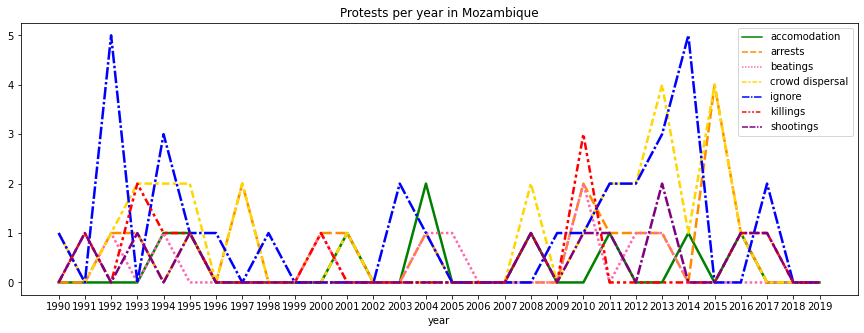

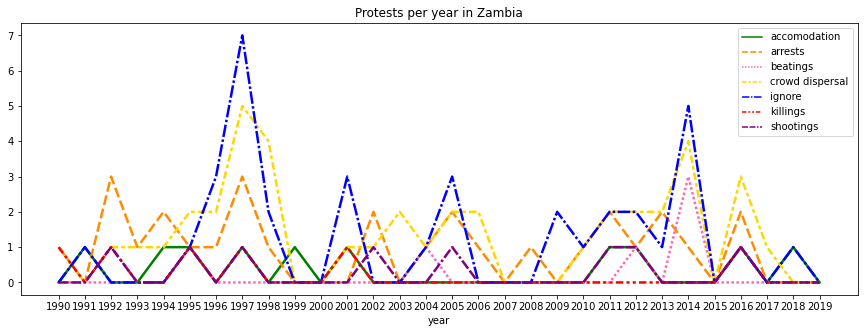

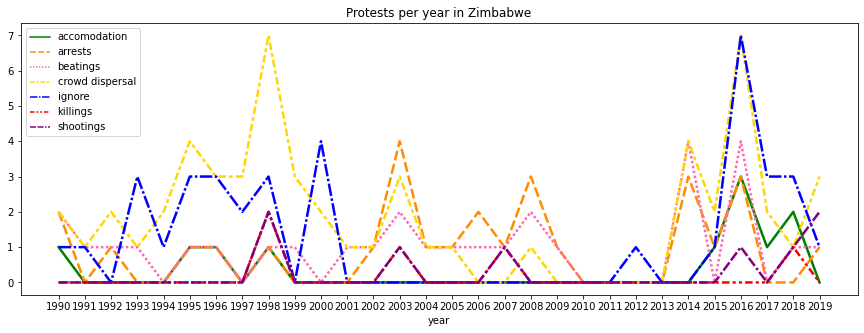

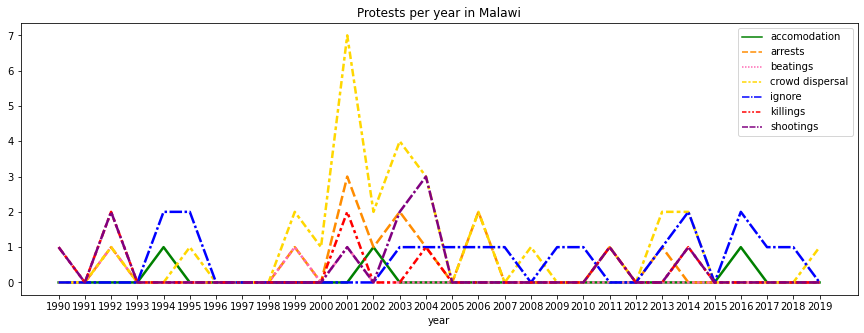

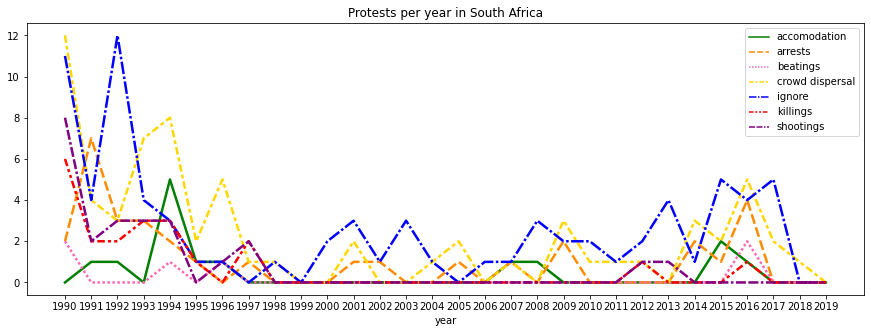

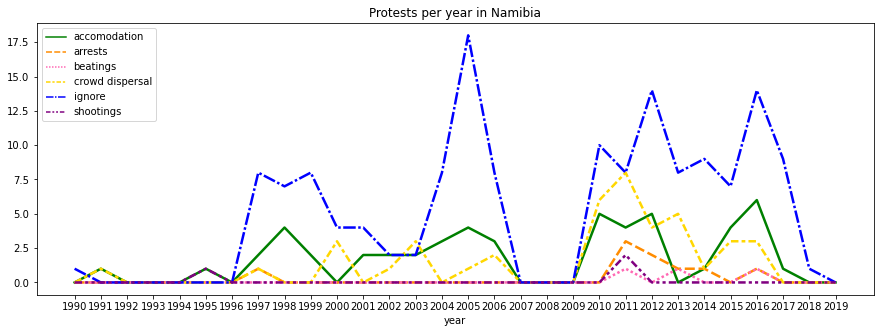

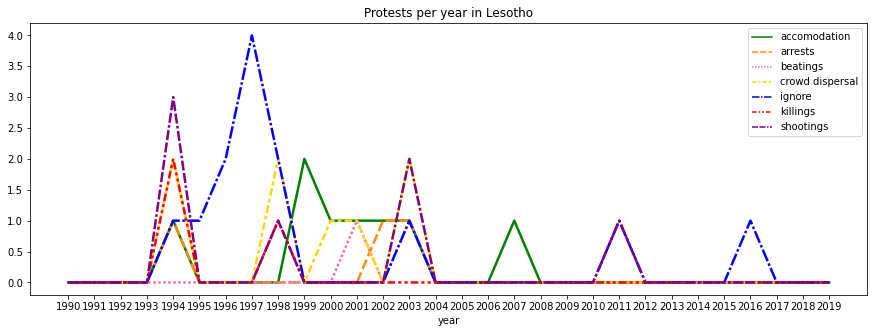

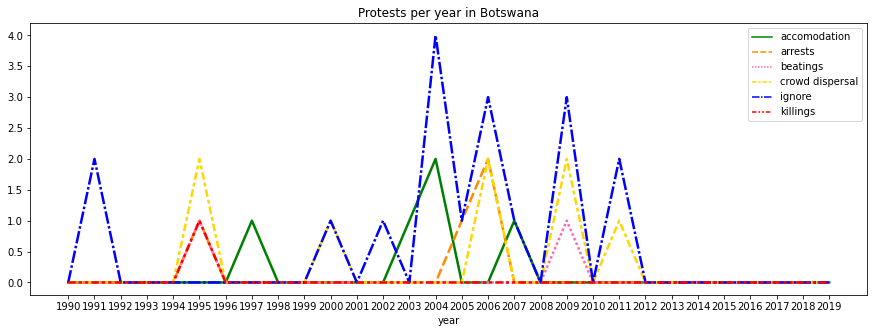

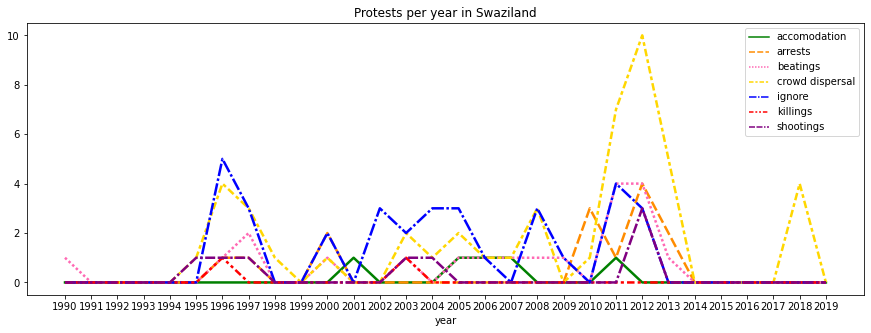

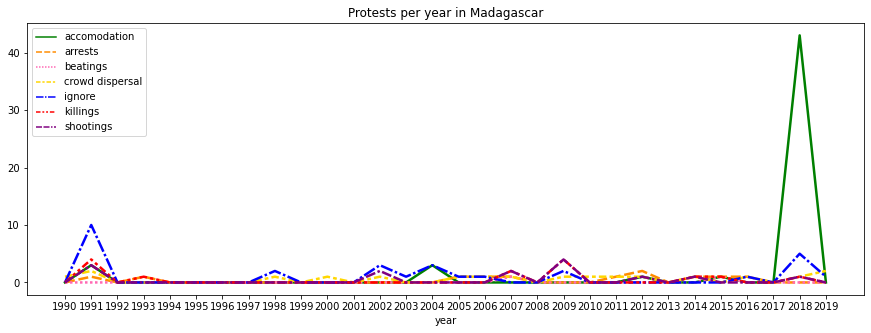

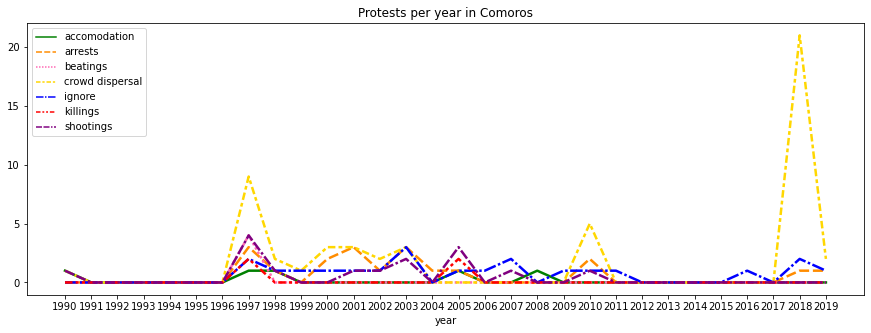

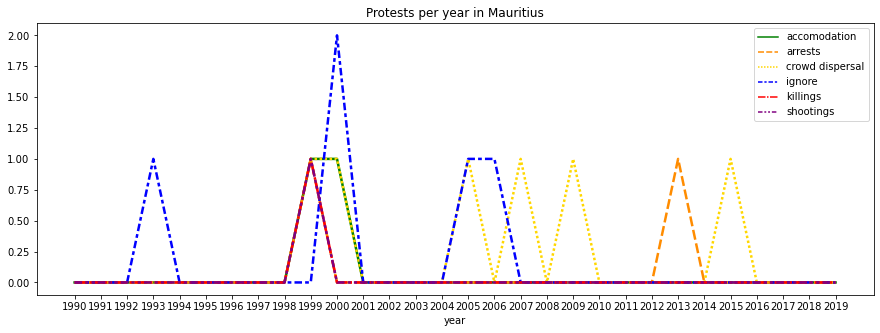

In [68]:
plot_list_per_year_country(africa_df, list_of_countries, list_of_responses, response_palette)